In [ ]:
from google.colab import drive #We import content from a file in drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Git clone is used to copy an existing Git repository to a new local directory
!git clone https://github.com/ultralytics/yolov5  

# Package management system used to install and manage software packages written in Python
!pip install -U -r yolov5/requirements.txt  

Cloning into 'yolov5'...
remote: Enumerating objects: 12169, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 12169 (delta 0), reused 2 (delta 0), pack-reused 12167
Receiving objects: 100% (12169/12169), 11.95 MiB | 33.62 MiB/s, done.
Resolving deltas: 100% (8427/8427), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 25.6 MB/s 
     |████████████████████████████████| 60.5 MB 1.3 MB/s 
     |████████████████████████████████| 3.1 MB 56.6 MB/s 
     |████████████████████████████████| 596 kB 59.9 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 38.1 MB 485 kB/s 
     |████████████████████████████████| 1.0 MB 52.0 MB/s 
     |████████████████████████████████| 5.8 MB 56.8 MB/s 
     |████████████████████████████████| 793 kB 69.7 MB/s 
     |████████████████████████████████| 2

In [ ]:
# We execute this code to be able to access the YOLO 5 folder and we can observe the architecture.
%cd /content/yolov5
%cat /content/yolov5/models/yolov5s.yaml

/content/yolov5
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4],

In [ ]:
import torch #We import Torch to perform numerical computations using tensor programming.
from IPython.display import Image  # We execute the code to be able to show the images


# In this step we will see if TORCH is in use of the GPU
print('Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Using torch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [ ]:
# We execute CURL to be able to verify the connectivity of URL addresses and for data transfers, they are also compatible for
# HTTP and HTTPS, FTP and FTPS, IMAP and IMAPS, POP3 and POP3S, SMB and SMBS, SFTP, SCP, TELNET , GOPHER, LDAP and LDAPS, SMTP and SMTPS
!curl -L "https://app.roboflow.com/ds/cbdwY2uYBY?key=784a1DxWNZ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
# !ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   2291      0 --:--:-- --:--:-- --:--:--  2285
100 22.3M  100 22.3M    0     0  28.5M      0 --:--:-- --:--:-- --:--:-- 28.5M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/120911685_3406334372777647_5958042774224477816_n_jpg.rf.fbc2823984ff10716d02e908e01e2f87.jpg  
 extracting: test/images/13247897_1238926916138609_1362606789618374335_o_jpg.rf.b2981529daad779f8d2c0d914518c63f.jpg  
 extracting: test/images/136670524_3943806662306766_21789444023573913_n_jpg.rf.4859862faed2bd570ceada685707b9f9.jpg  
 extracting: test/images/277795523_106266722058962_372102048249220315_n_jpg.rf.4aabf408318cfed91cc8570384afead6.jpg  
 extracting: test/images/46

In [ ]:
# The YAML command is a data declaration language that makes it easy for the user to read and write.
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 3
names: ['atendiendo', 'distraido', 'dormido']

In [ ]:
# In this part we define the number of classes that we will use in the code and in the database
num_classes = 3

#We will import register_line_cell_magic to be able to use various utilities to be able to overwrite a file directly from cells and extract and upload the file
#We will use writetemplate to customize ipython
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
#We change the location of the training sets and the validation of the file but the file will remain the same

%%writetemplate /content/yolov5/data.yaml

train: ./train/images
val: ./test/images

nc: 3 #numbers of the classes
names: ['atendiendo', 'distraido', 'dormido'] #name of classes


In [ ]:
%cat data.yaml


train: ./train/images
val: ./test/images

nc: 3
names: ['atendiendo', 'distraido', 'dormido']

In [ ]:
#We change the number of classes that was defined in YOLO5 and keep the rest the same way
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters that we will use

#Number of classes 
nc: {num_classes} 

#Model depth multiple
depth_multiple: 0.33  

#Layer channel multiple
width_multiple: 0.50  

#Anchor
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

#We define the column that we will use in YOLO5
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

#Head of YOLO%
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat models/custom_yolov5s.yaml


# parameters
nc: 3  # number of classes 
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[

In [ ]:
#Since we are exporting a large set of various data for YOLO5 we do not need to resize the images.

#We will understand the model for 75 epochs with a lot size of 16
#These data will be changed according to the number of times that are convenient and the number of batches that are necessary.

%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 75 --data './data.yaml' --cfg './models/yolov5s.yaml' --weights '' --name yolov5s_results --cache

/content/yolov5
train: weights=, cfg=./models/yolov5s.yaml, data=./data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=75, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-243-g7cef03d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

In [ ]:
#In this part we uninstall and install again the matplotlib library
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the pa

In [ ]:
#This library allows us to edit images directly from python and supports GIF, JPEG and PNG formats.
pip install Pillow==9.0.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# final weights will be stored by default at /content/yolov5/runs/train/exp2/weights/best.pt
%cd /content/yolov5/

!python detect.py --weights /content/yolov5/runs/train/yolov5s_results3/weights/best.pt --img 416 --conf 0.30 --source /content/yolov5/test/Driving

/content/yolov5
detect: weights=['/content/yolov5/runs/train/yolov5s_results3/weights/best.pt'], source=/content/yolov5/test/Driving, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-243-g7cef03d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "detect.py", line 252, in <module>
    main(opt)
  File "detect.py", line 247, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "detect.p

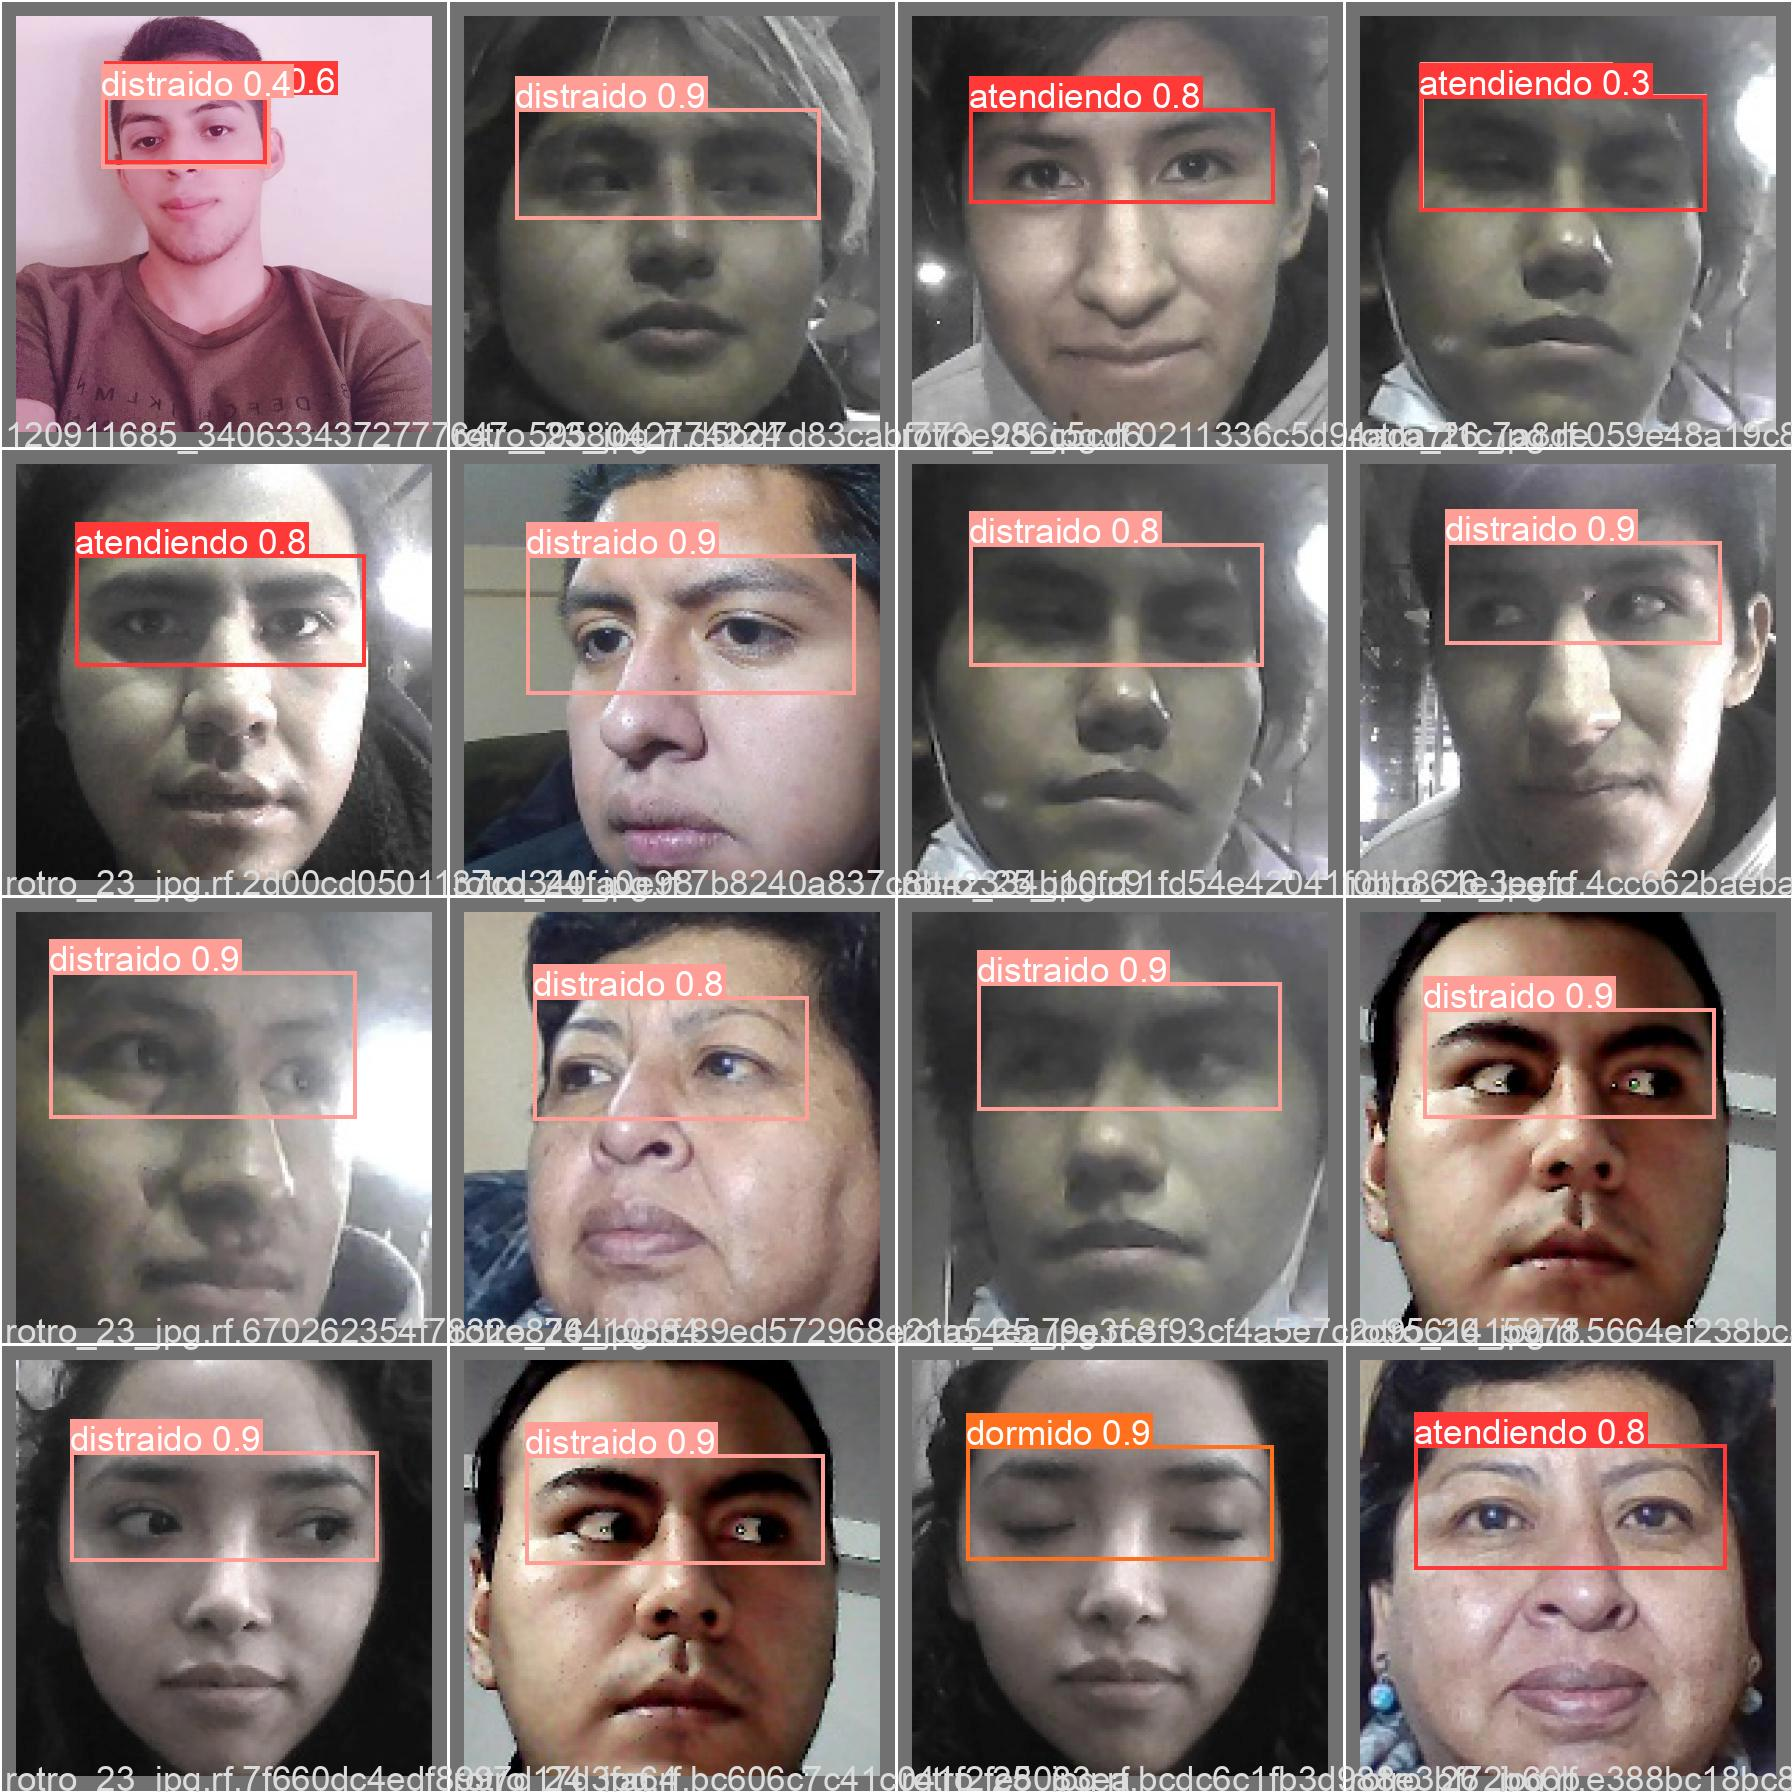

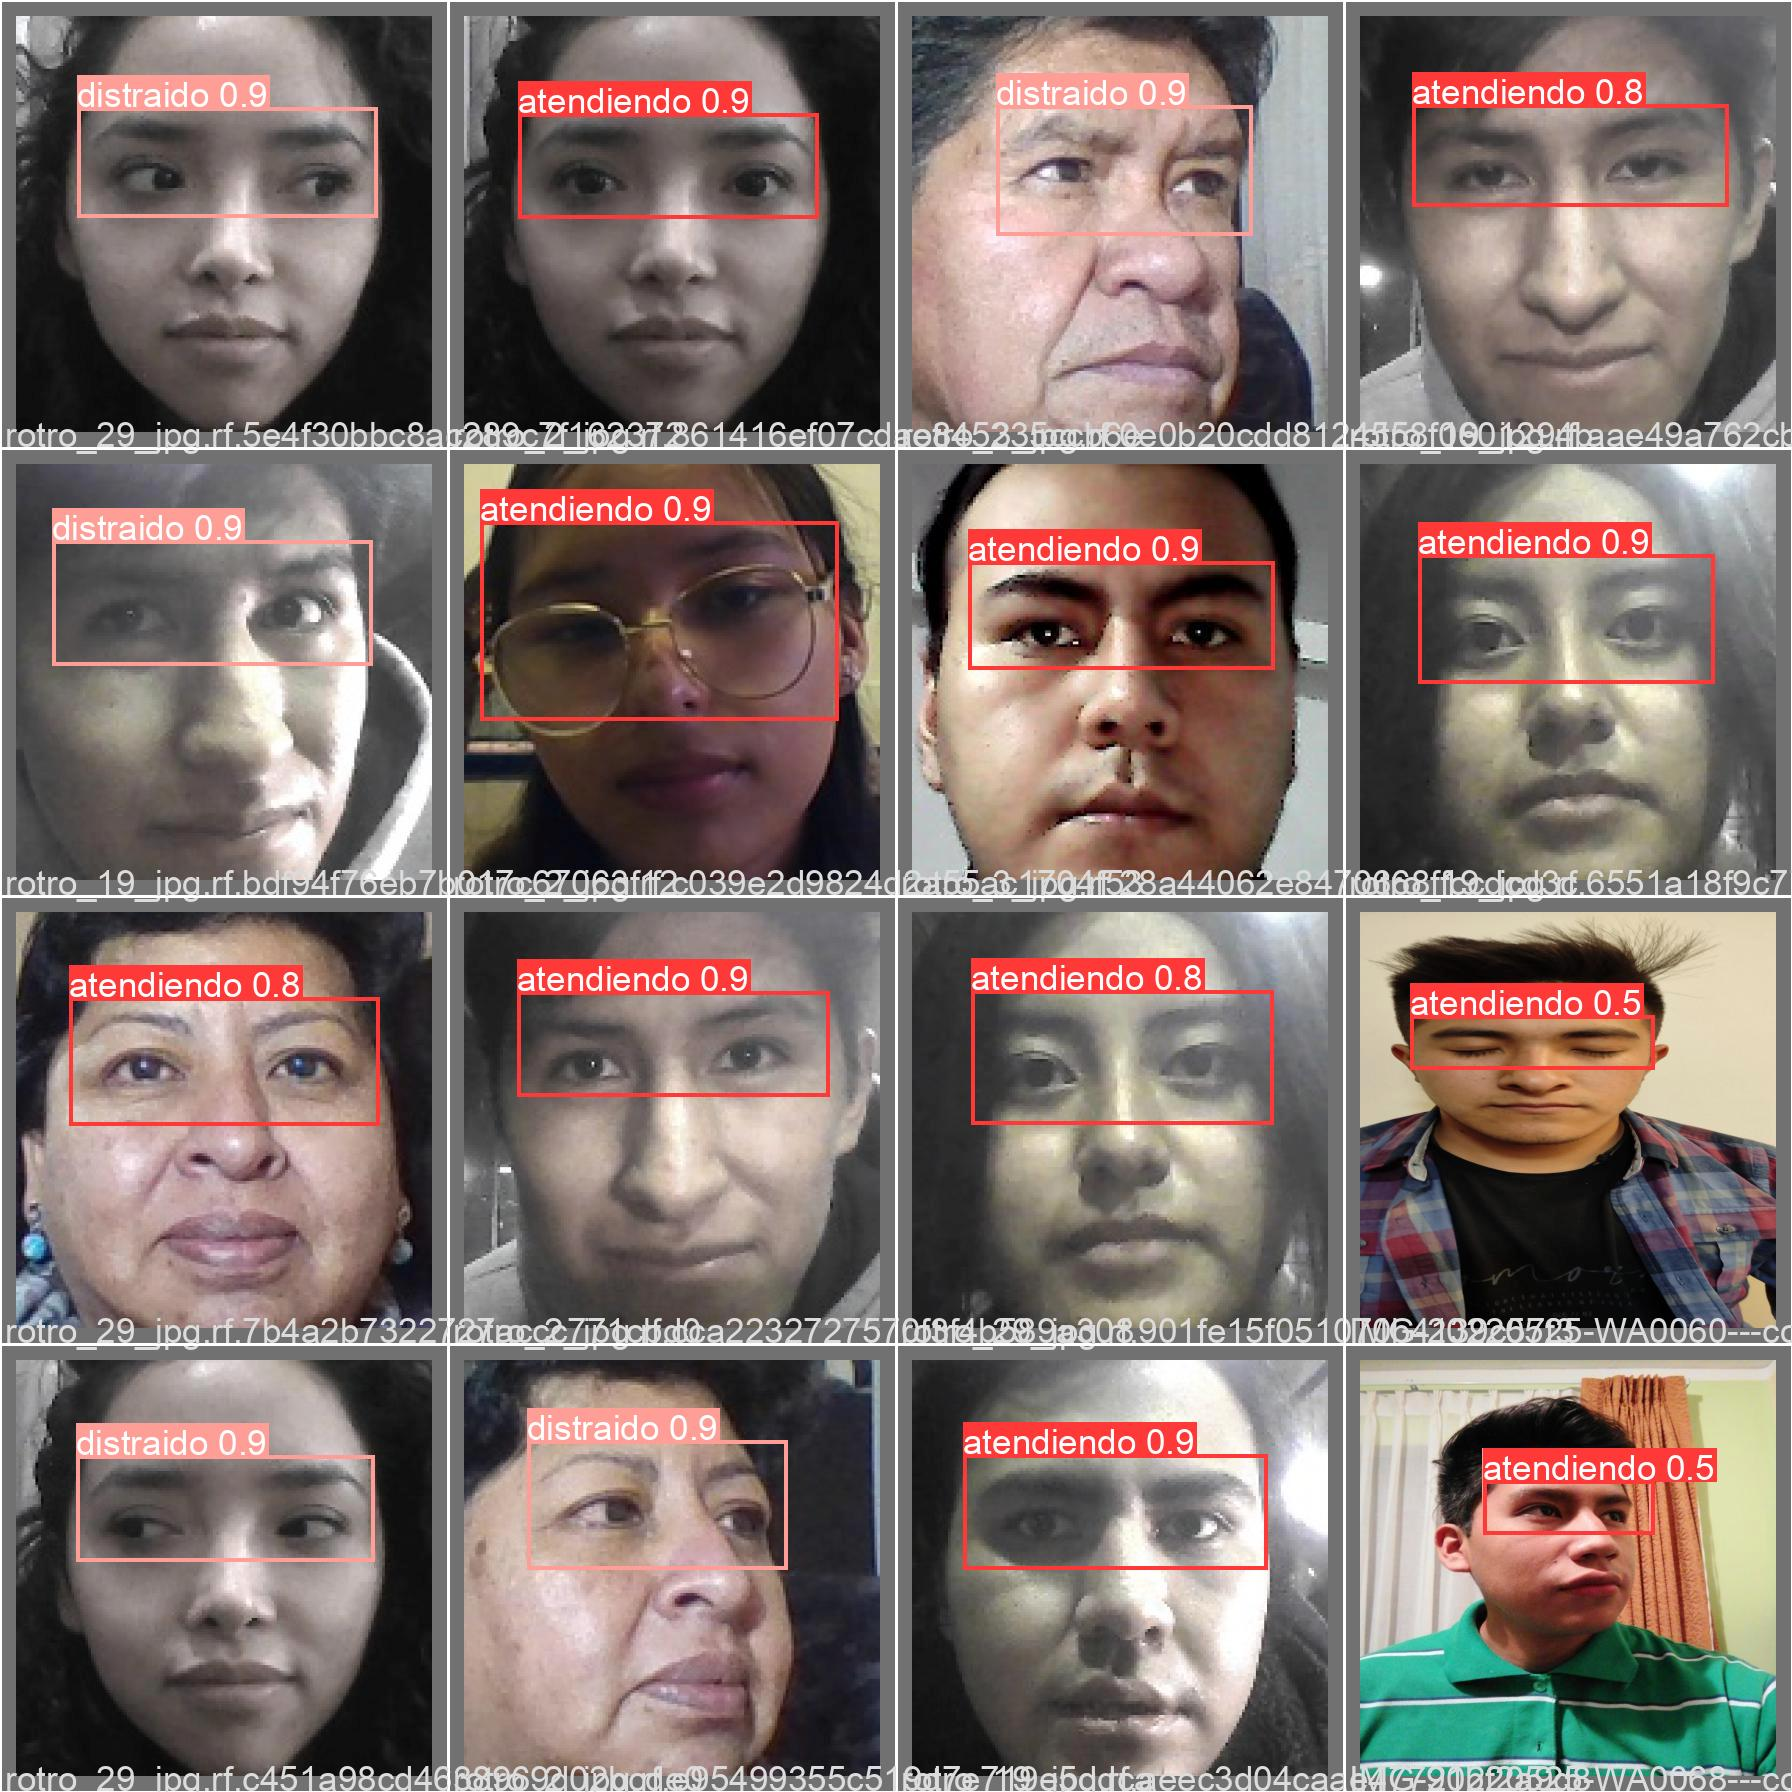

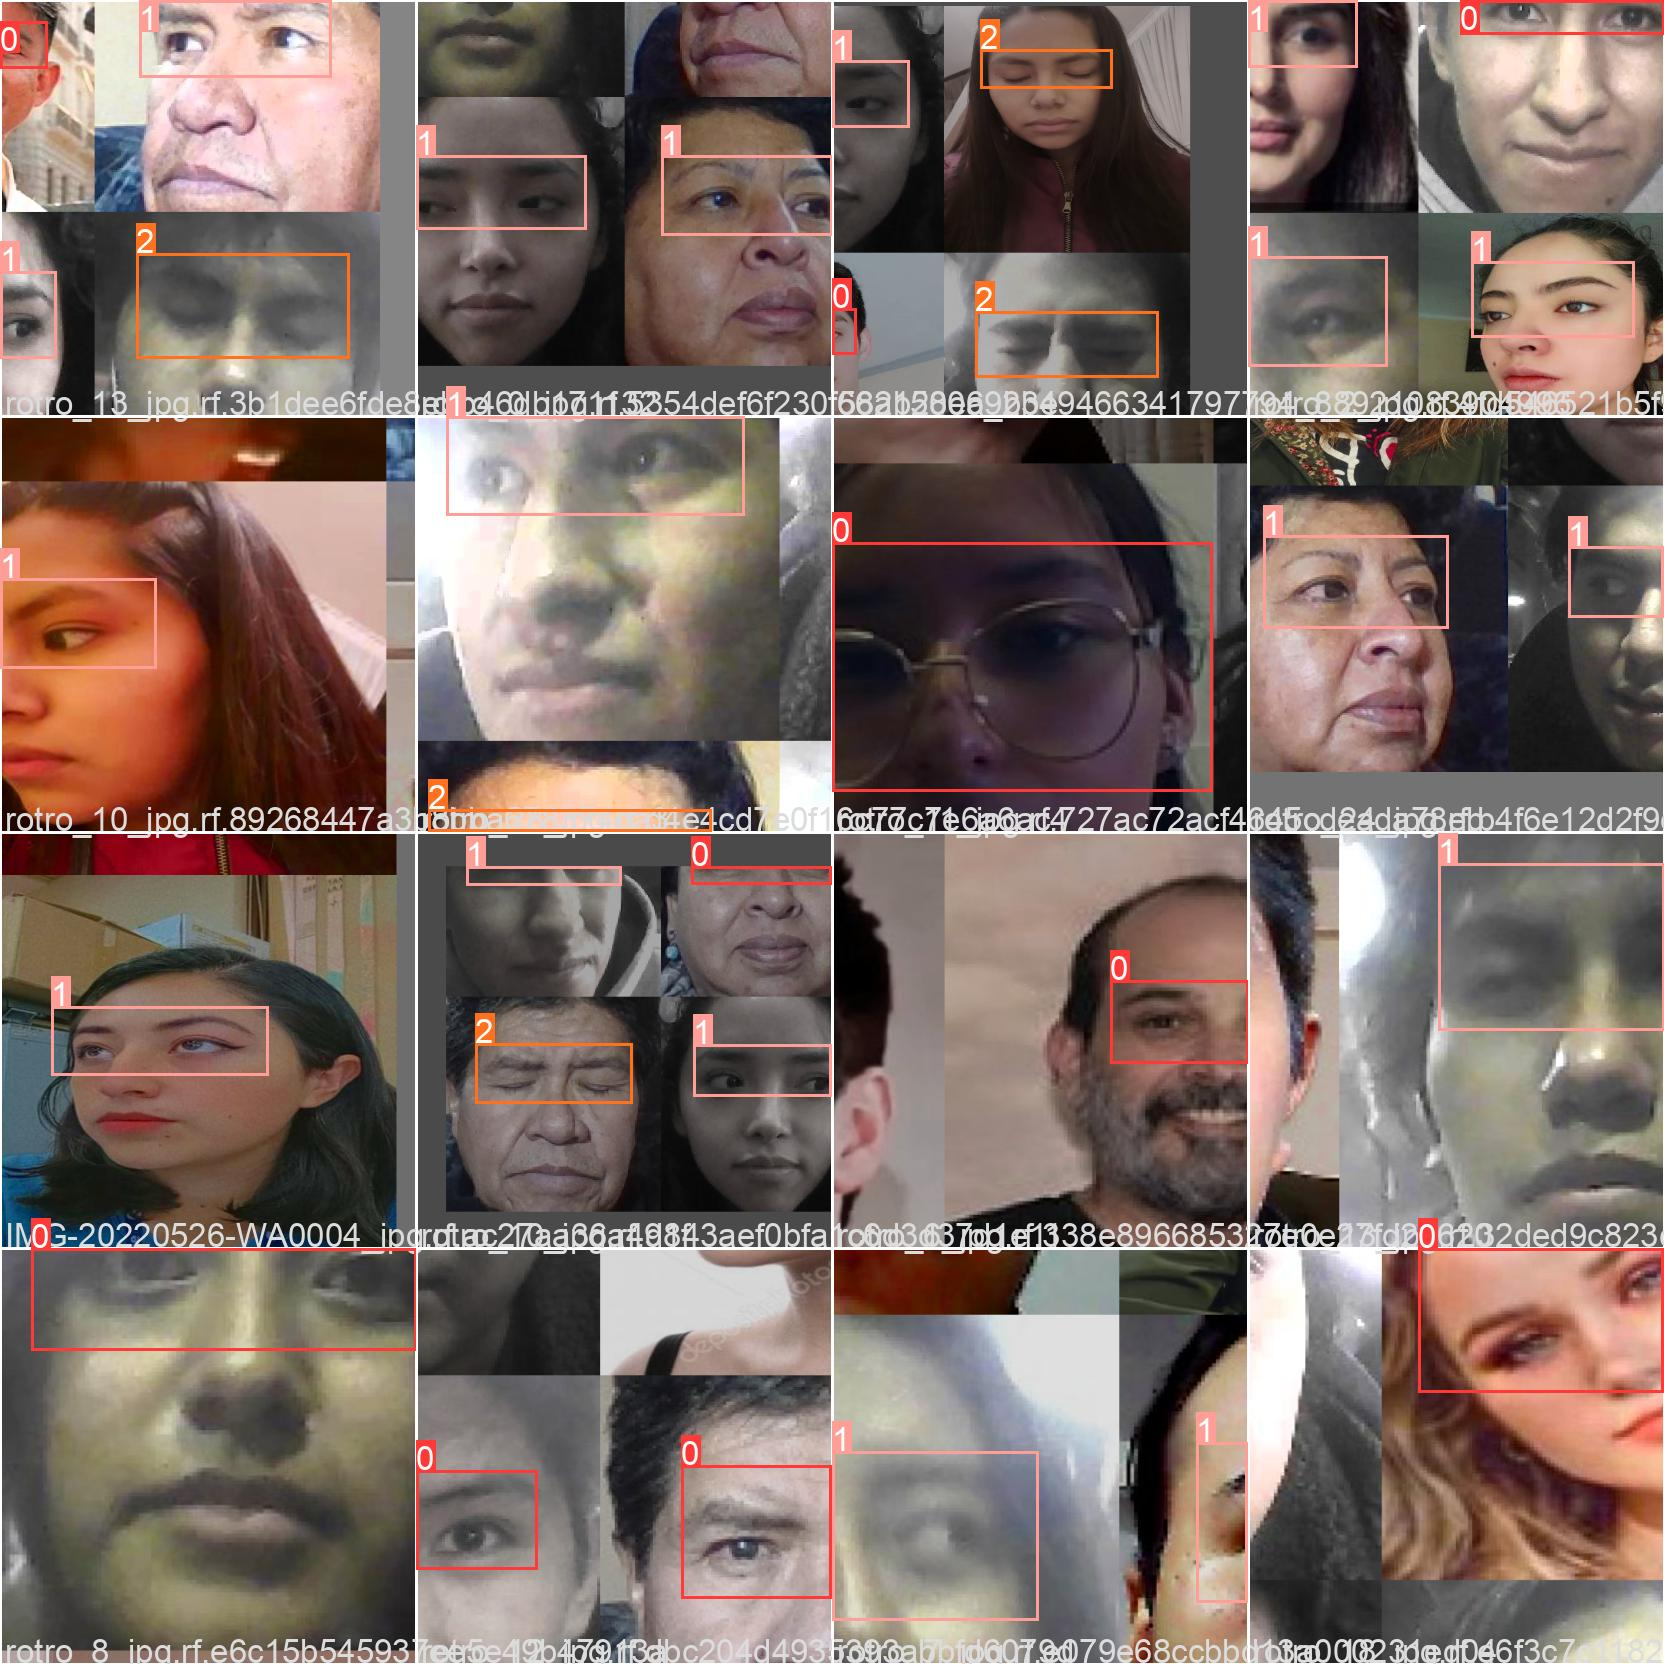

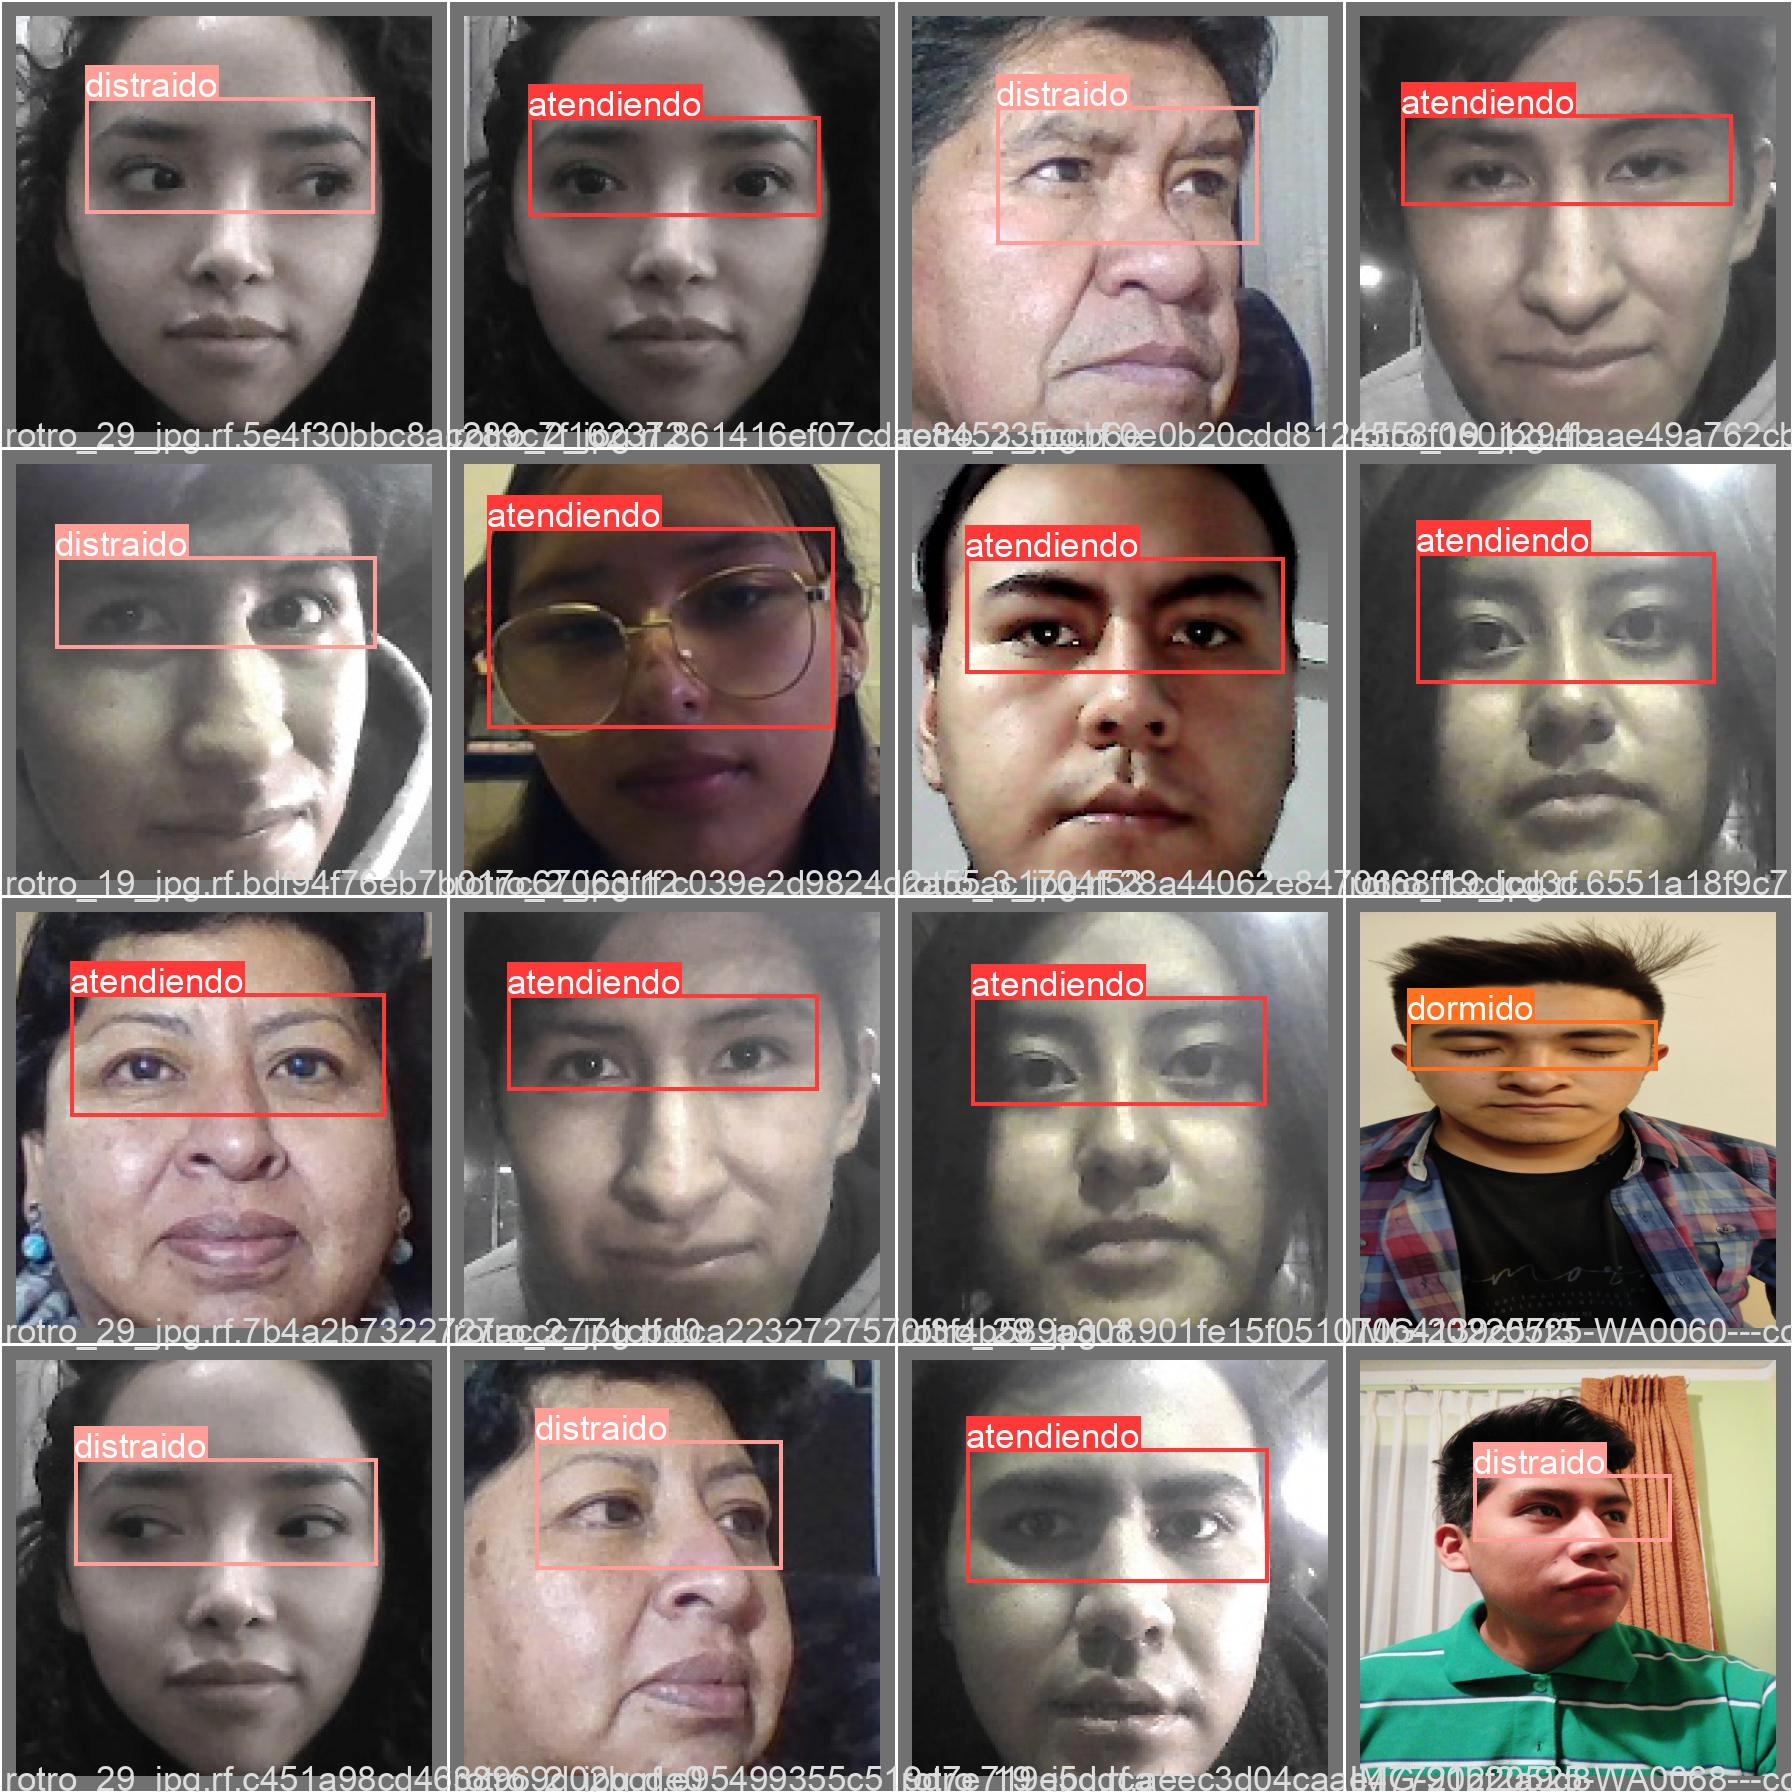

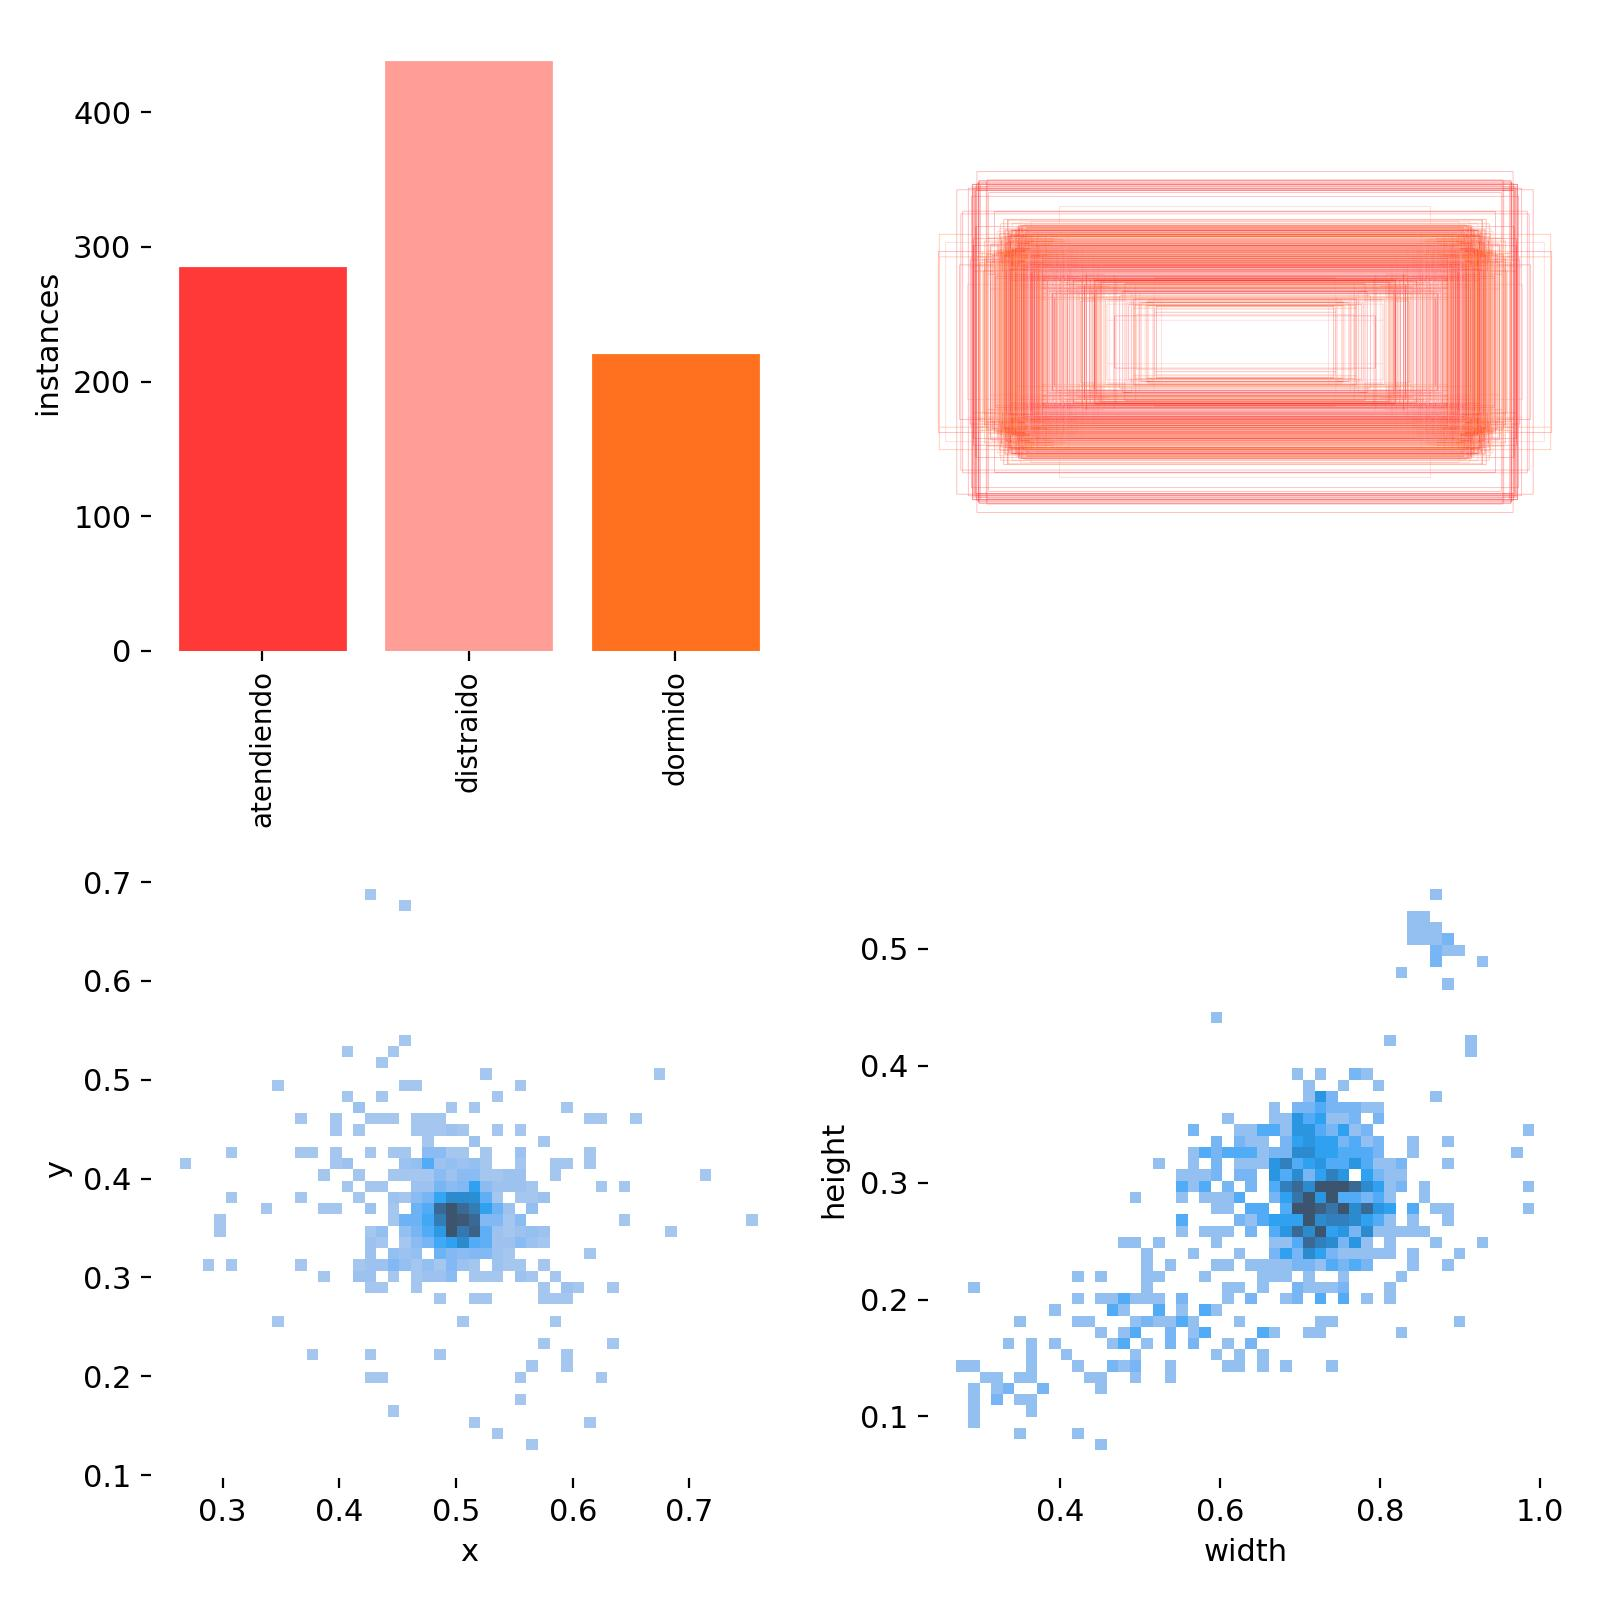

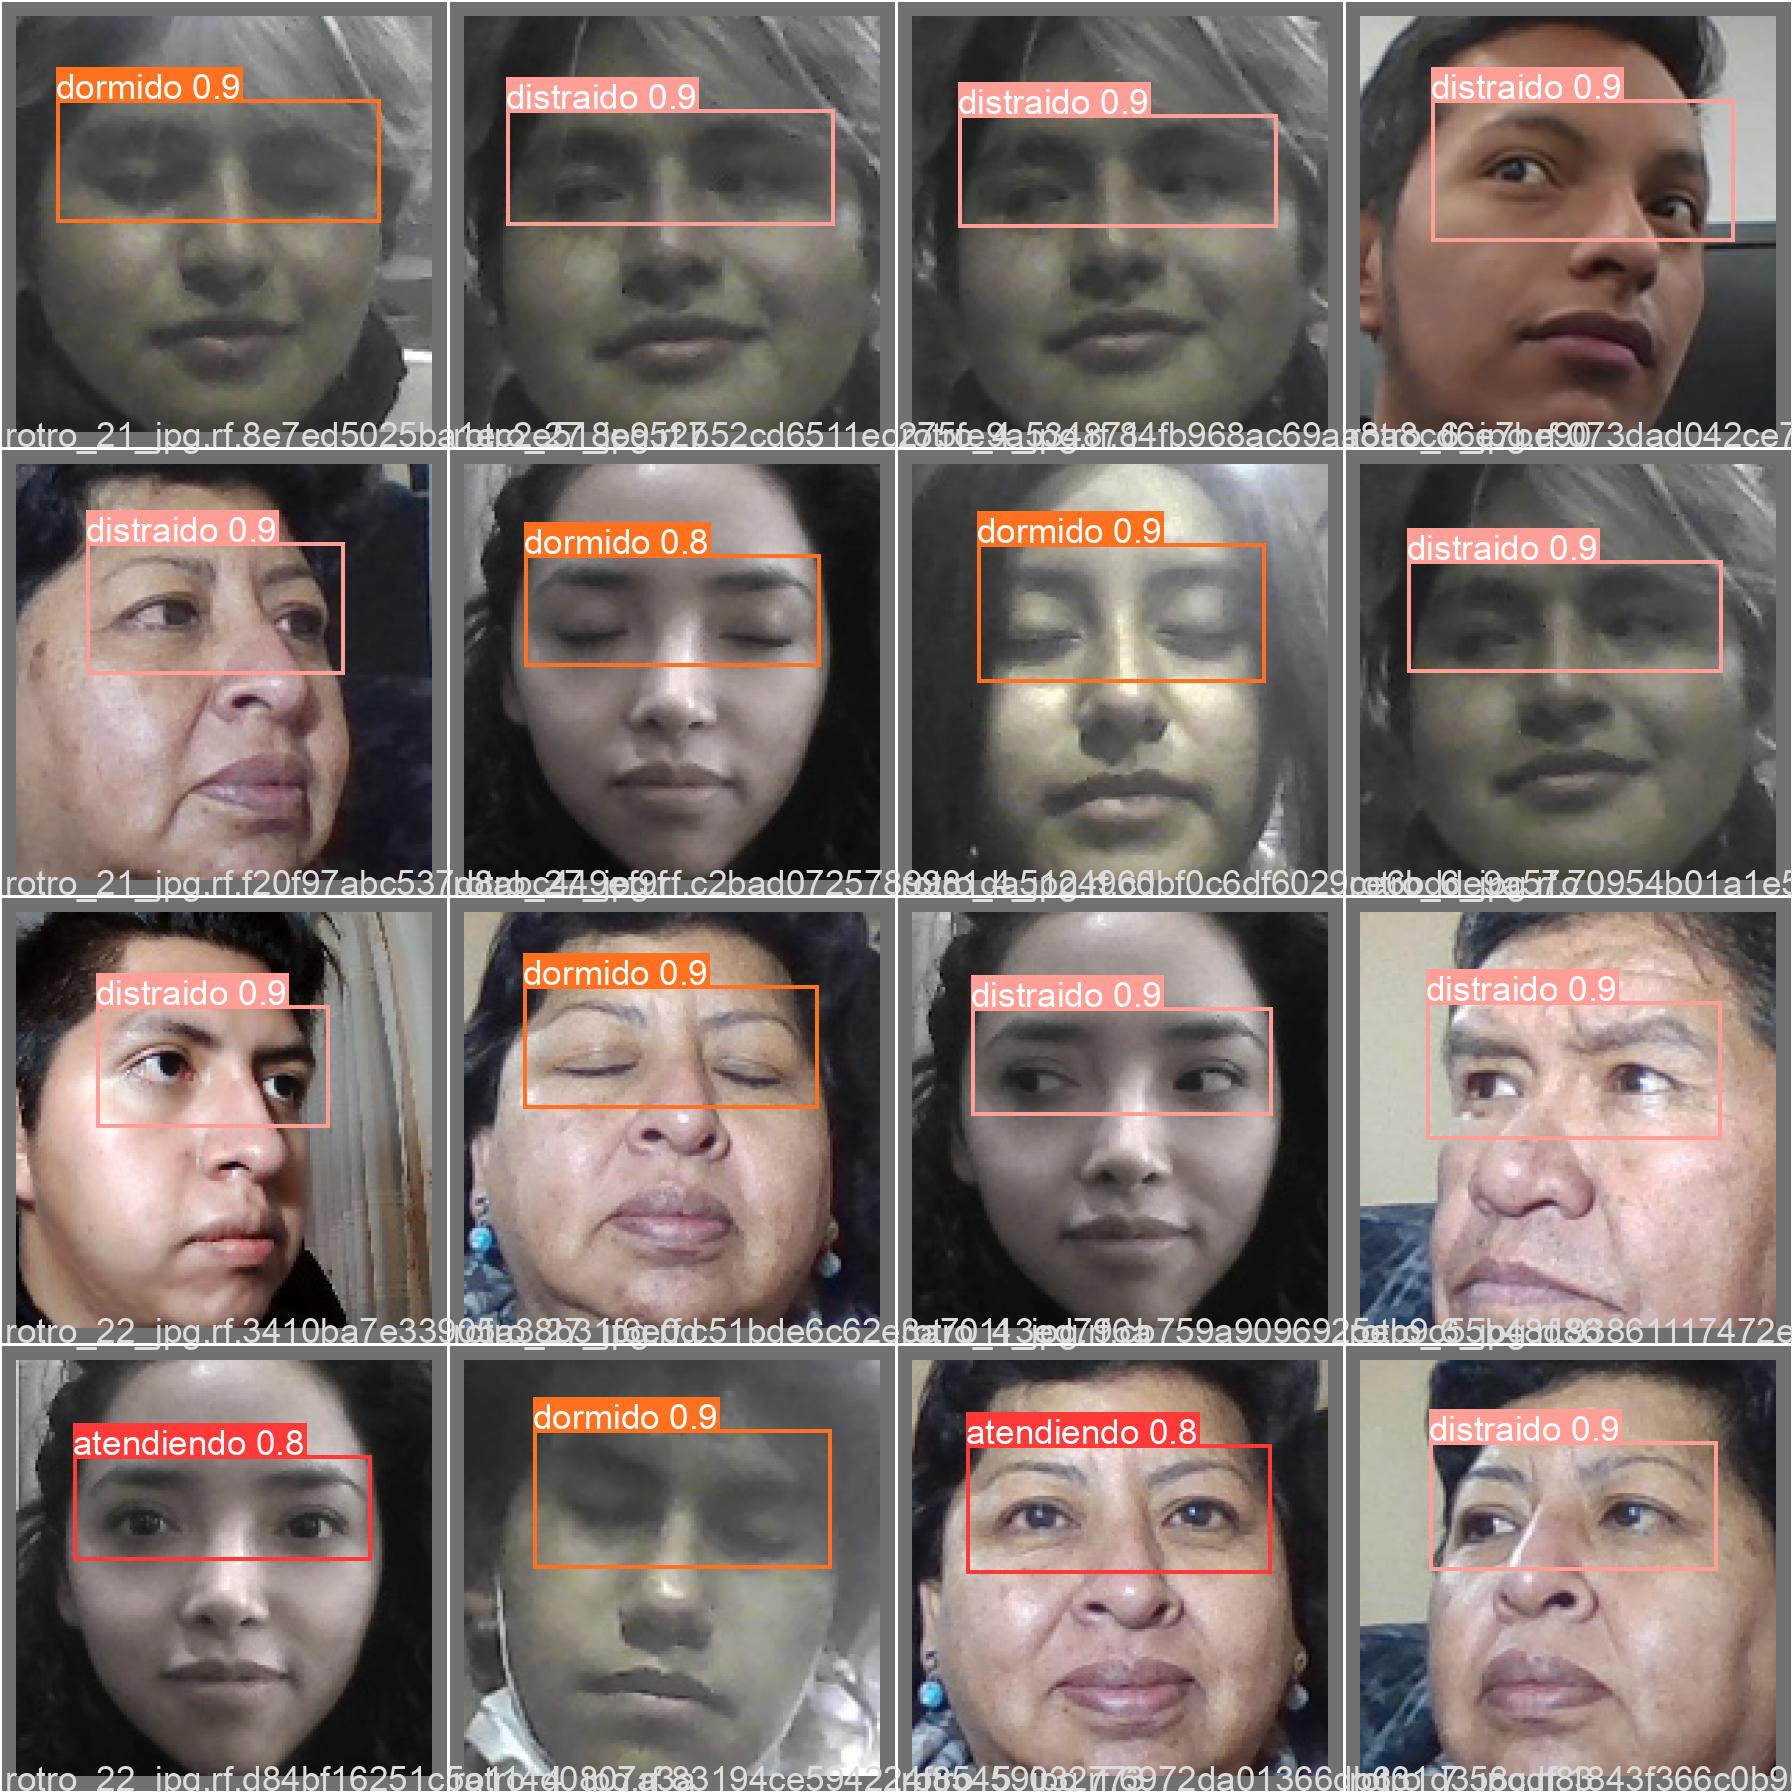

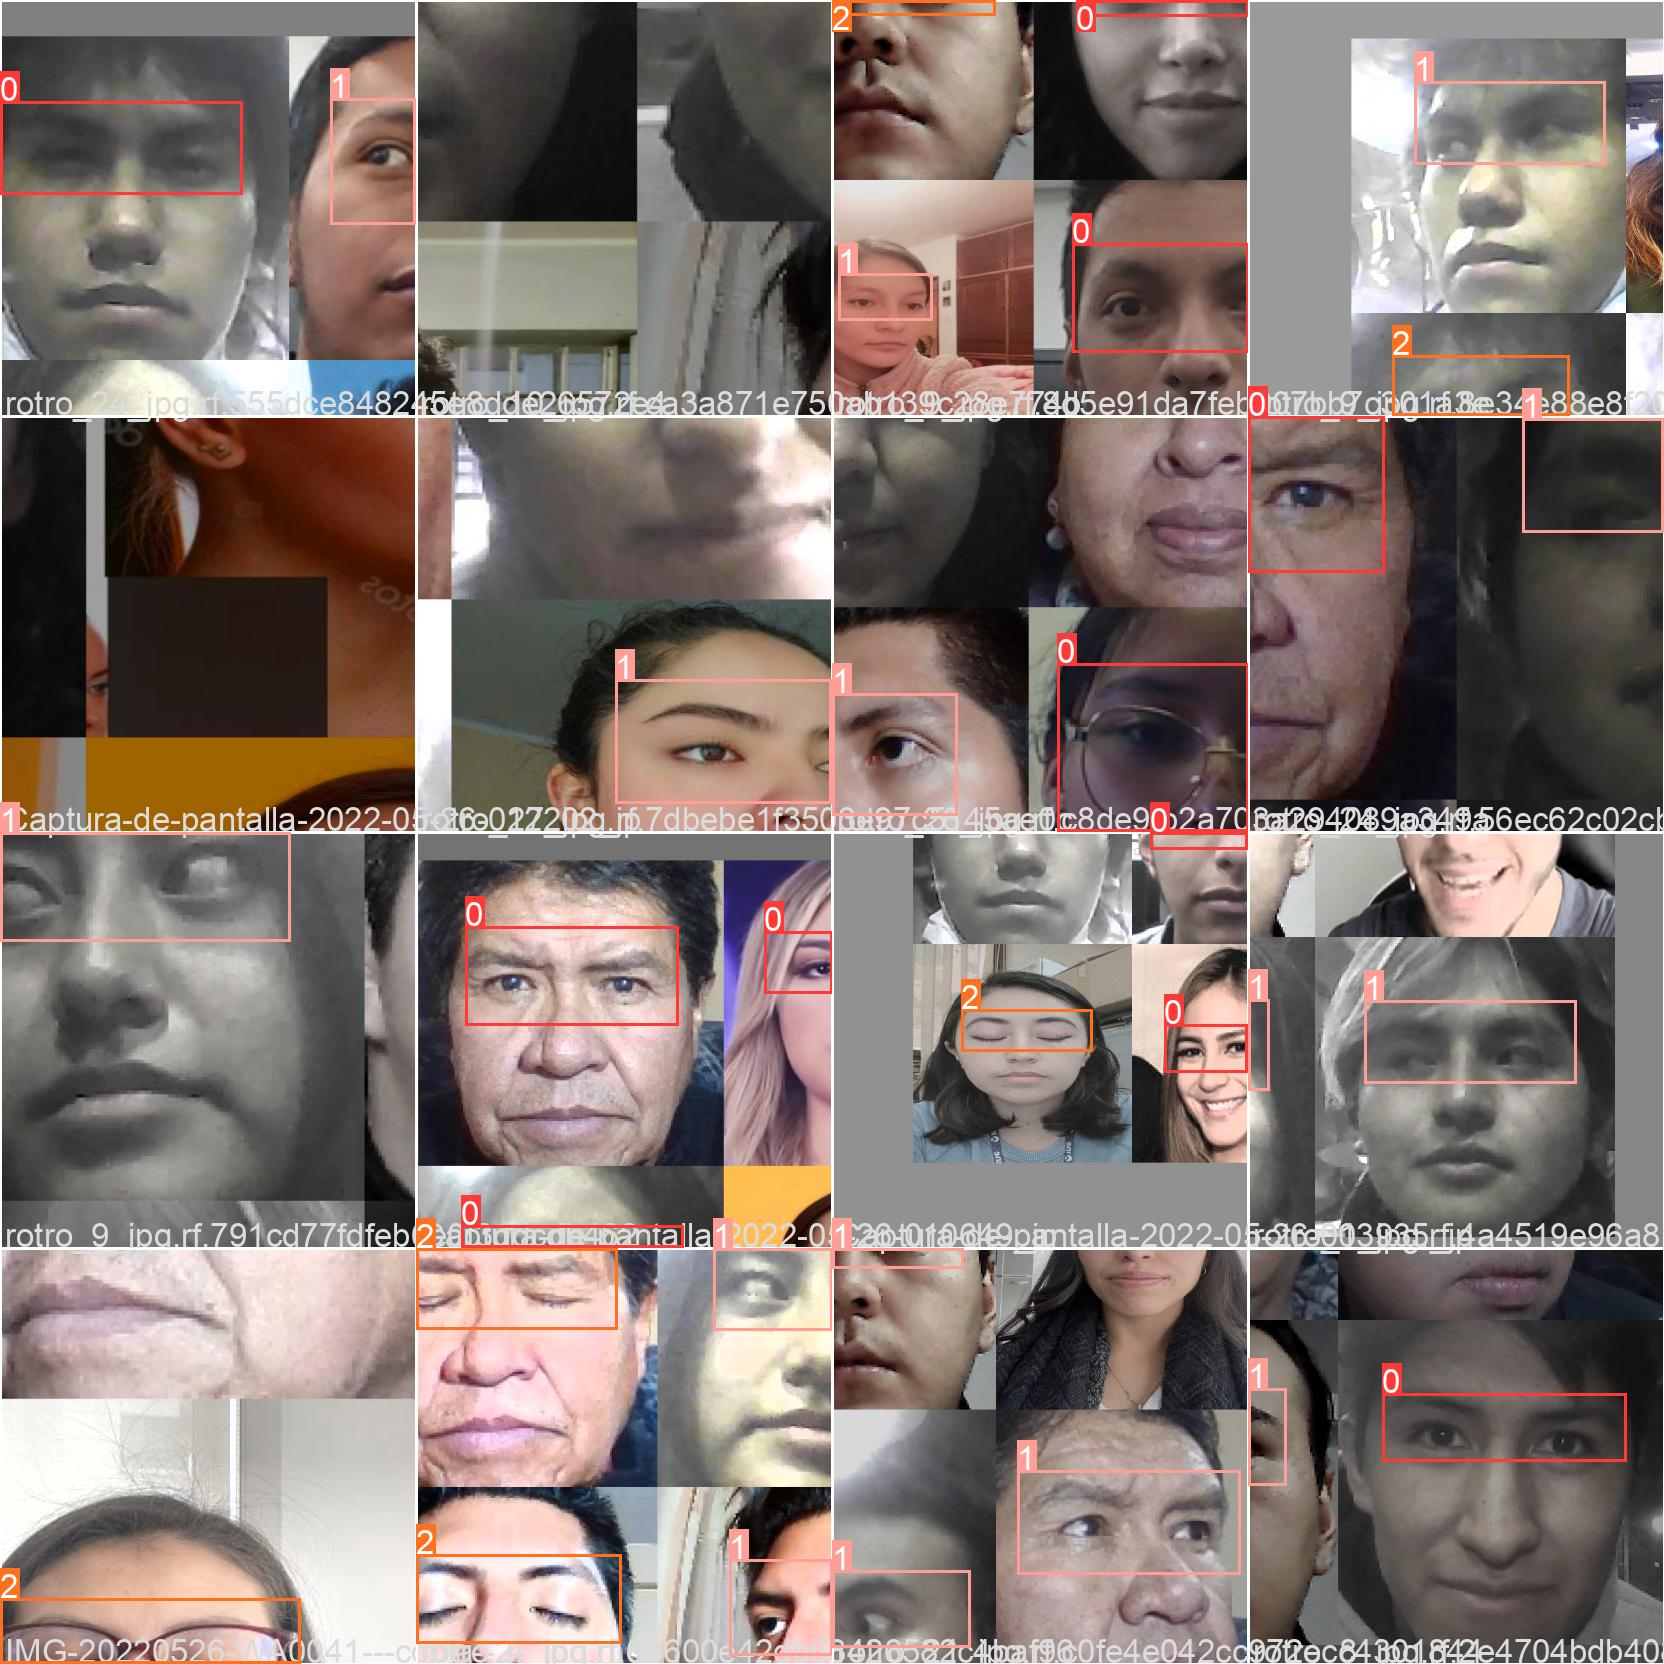

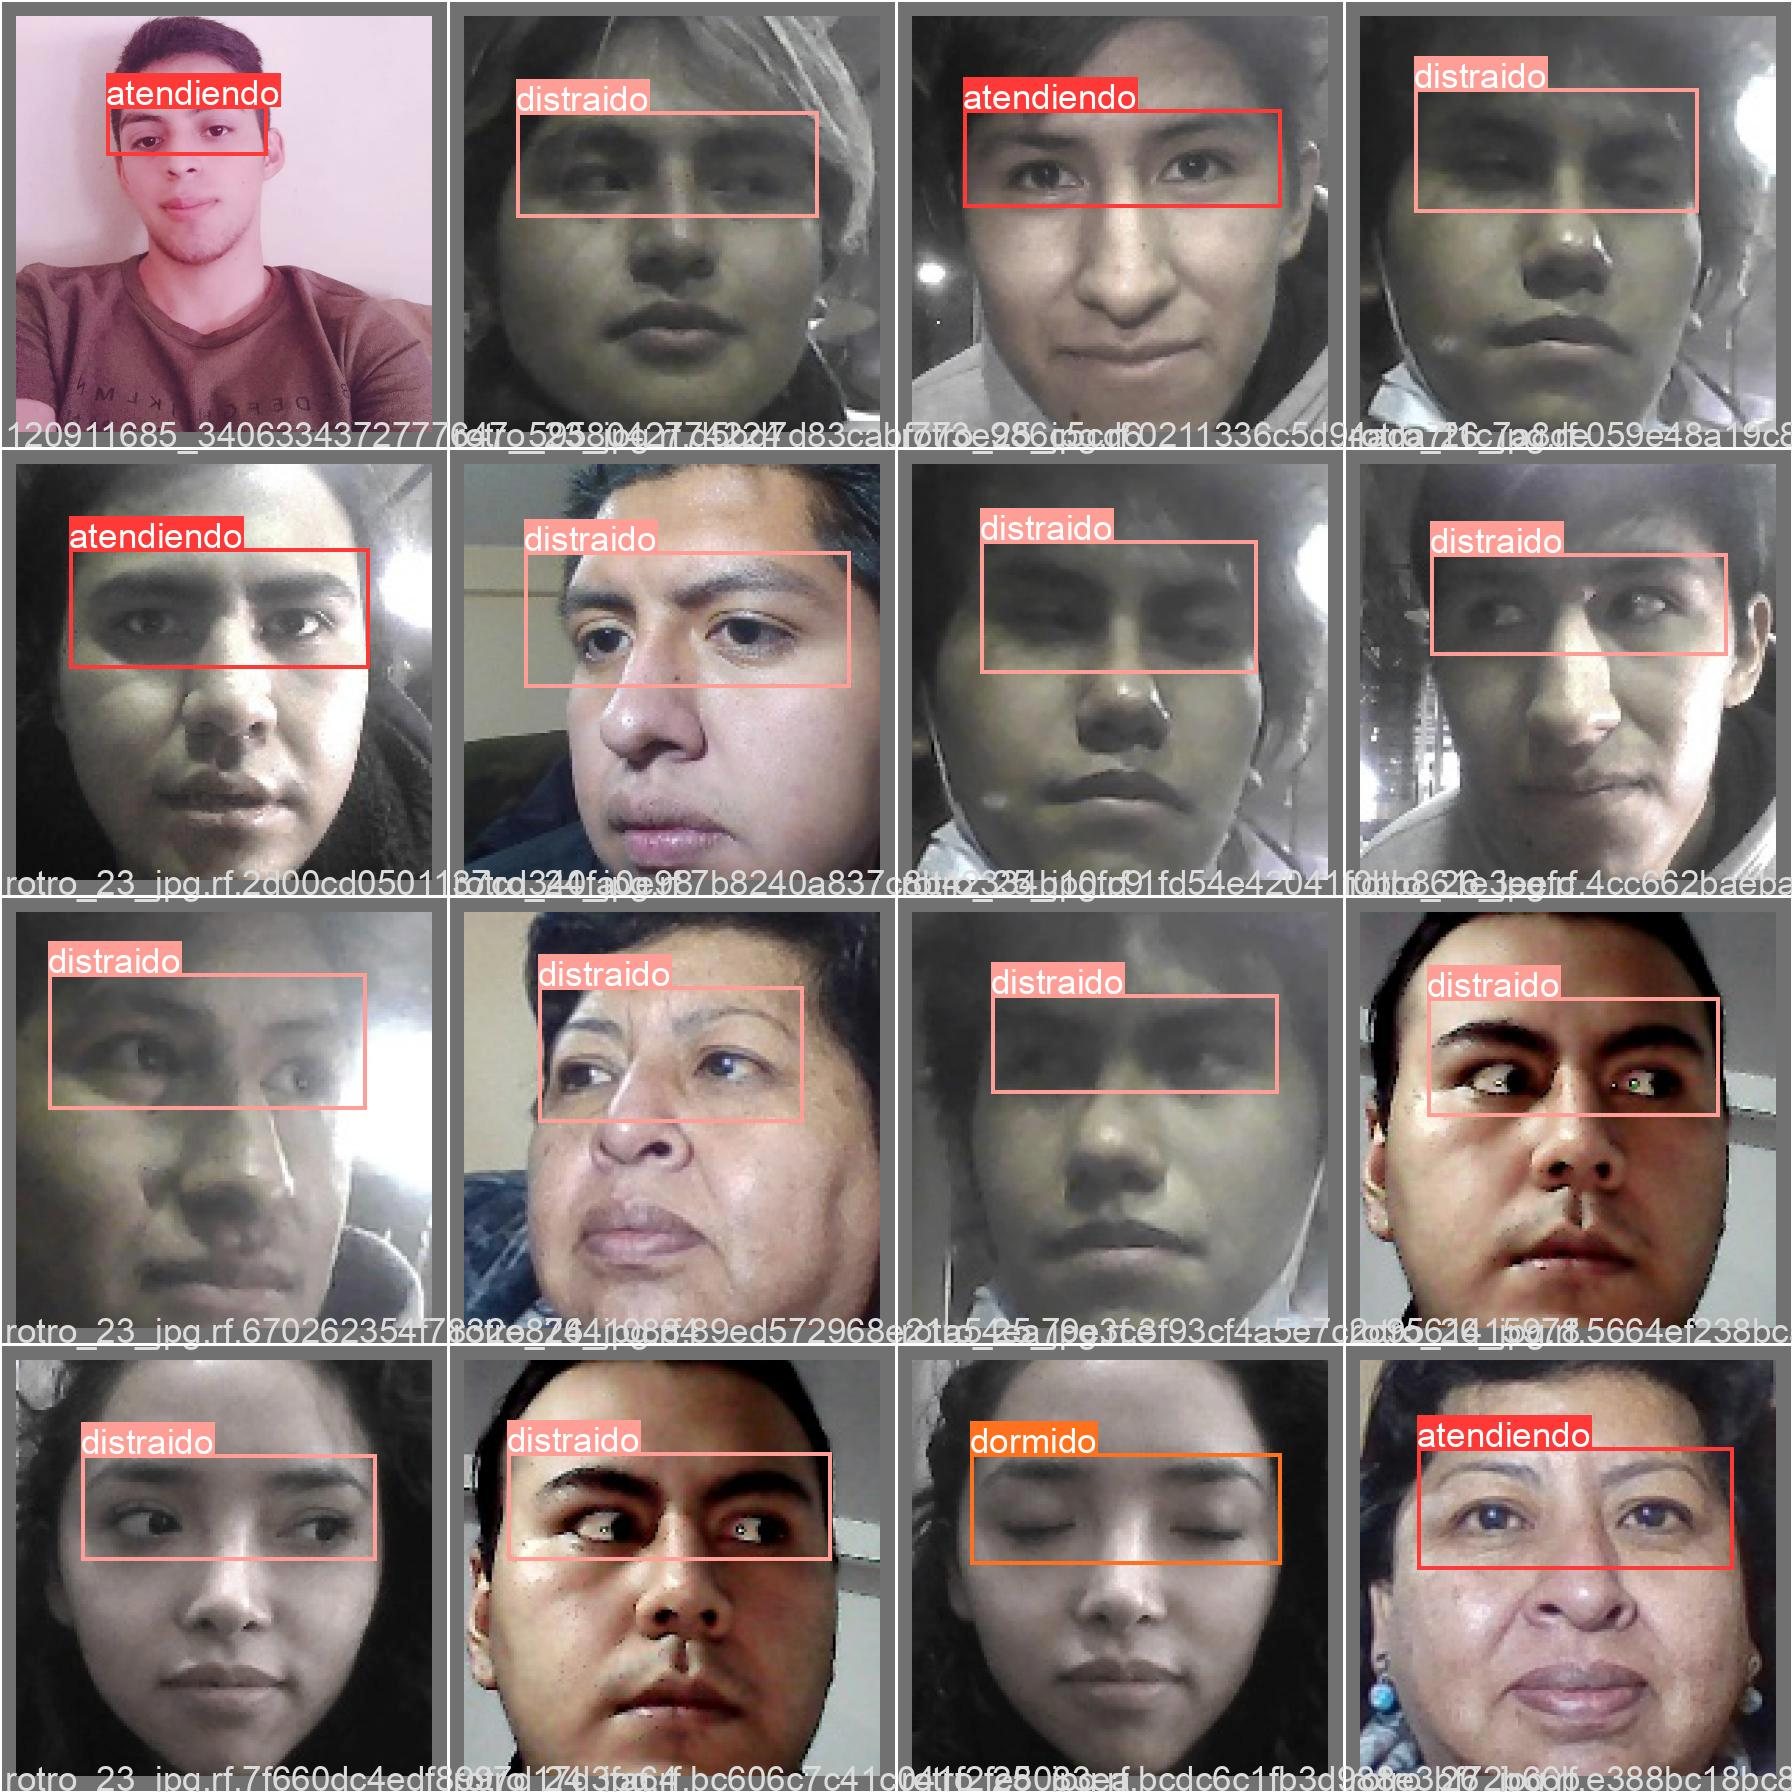

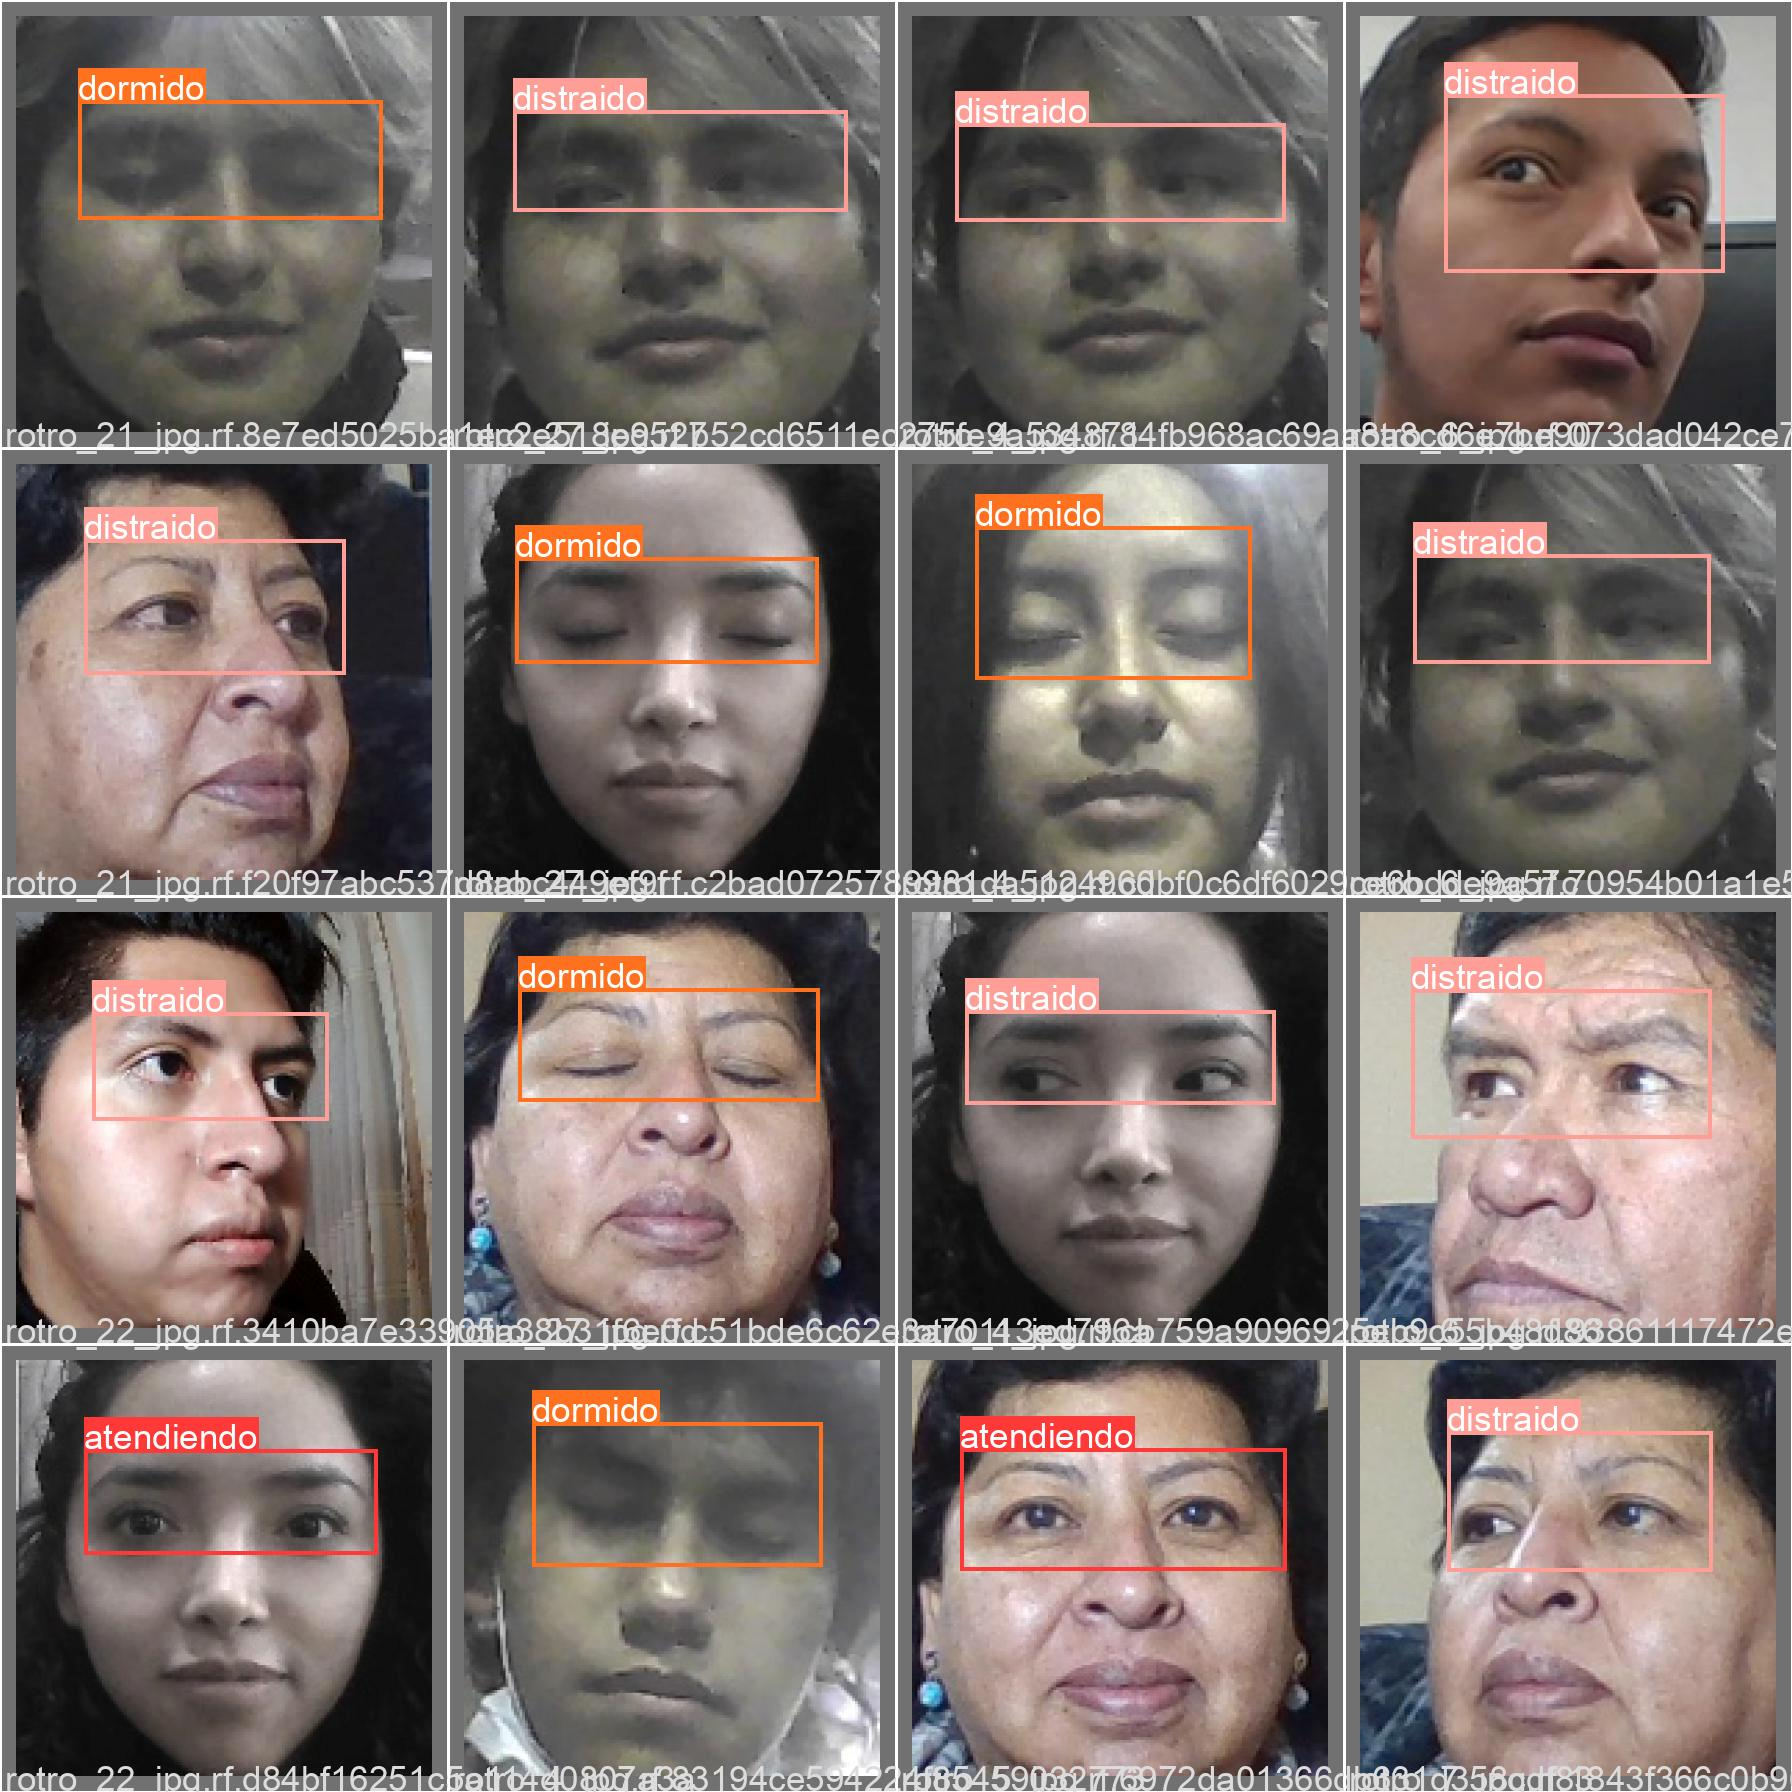

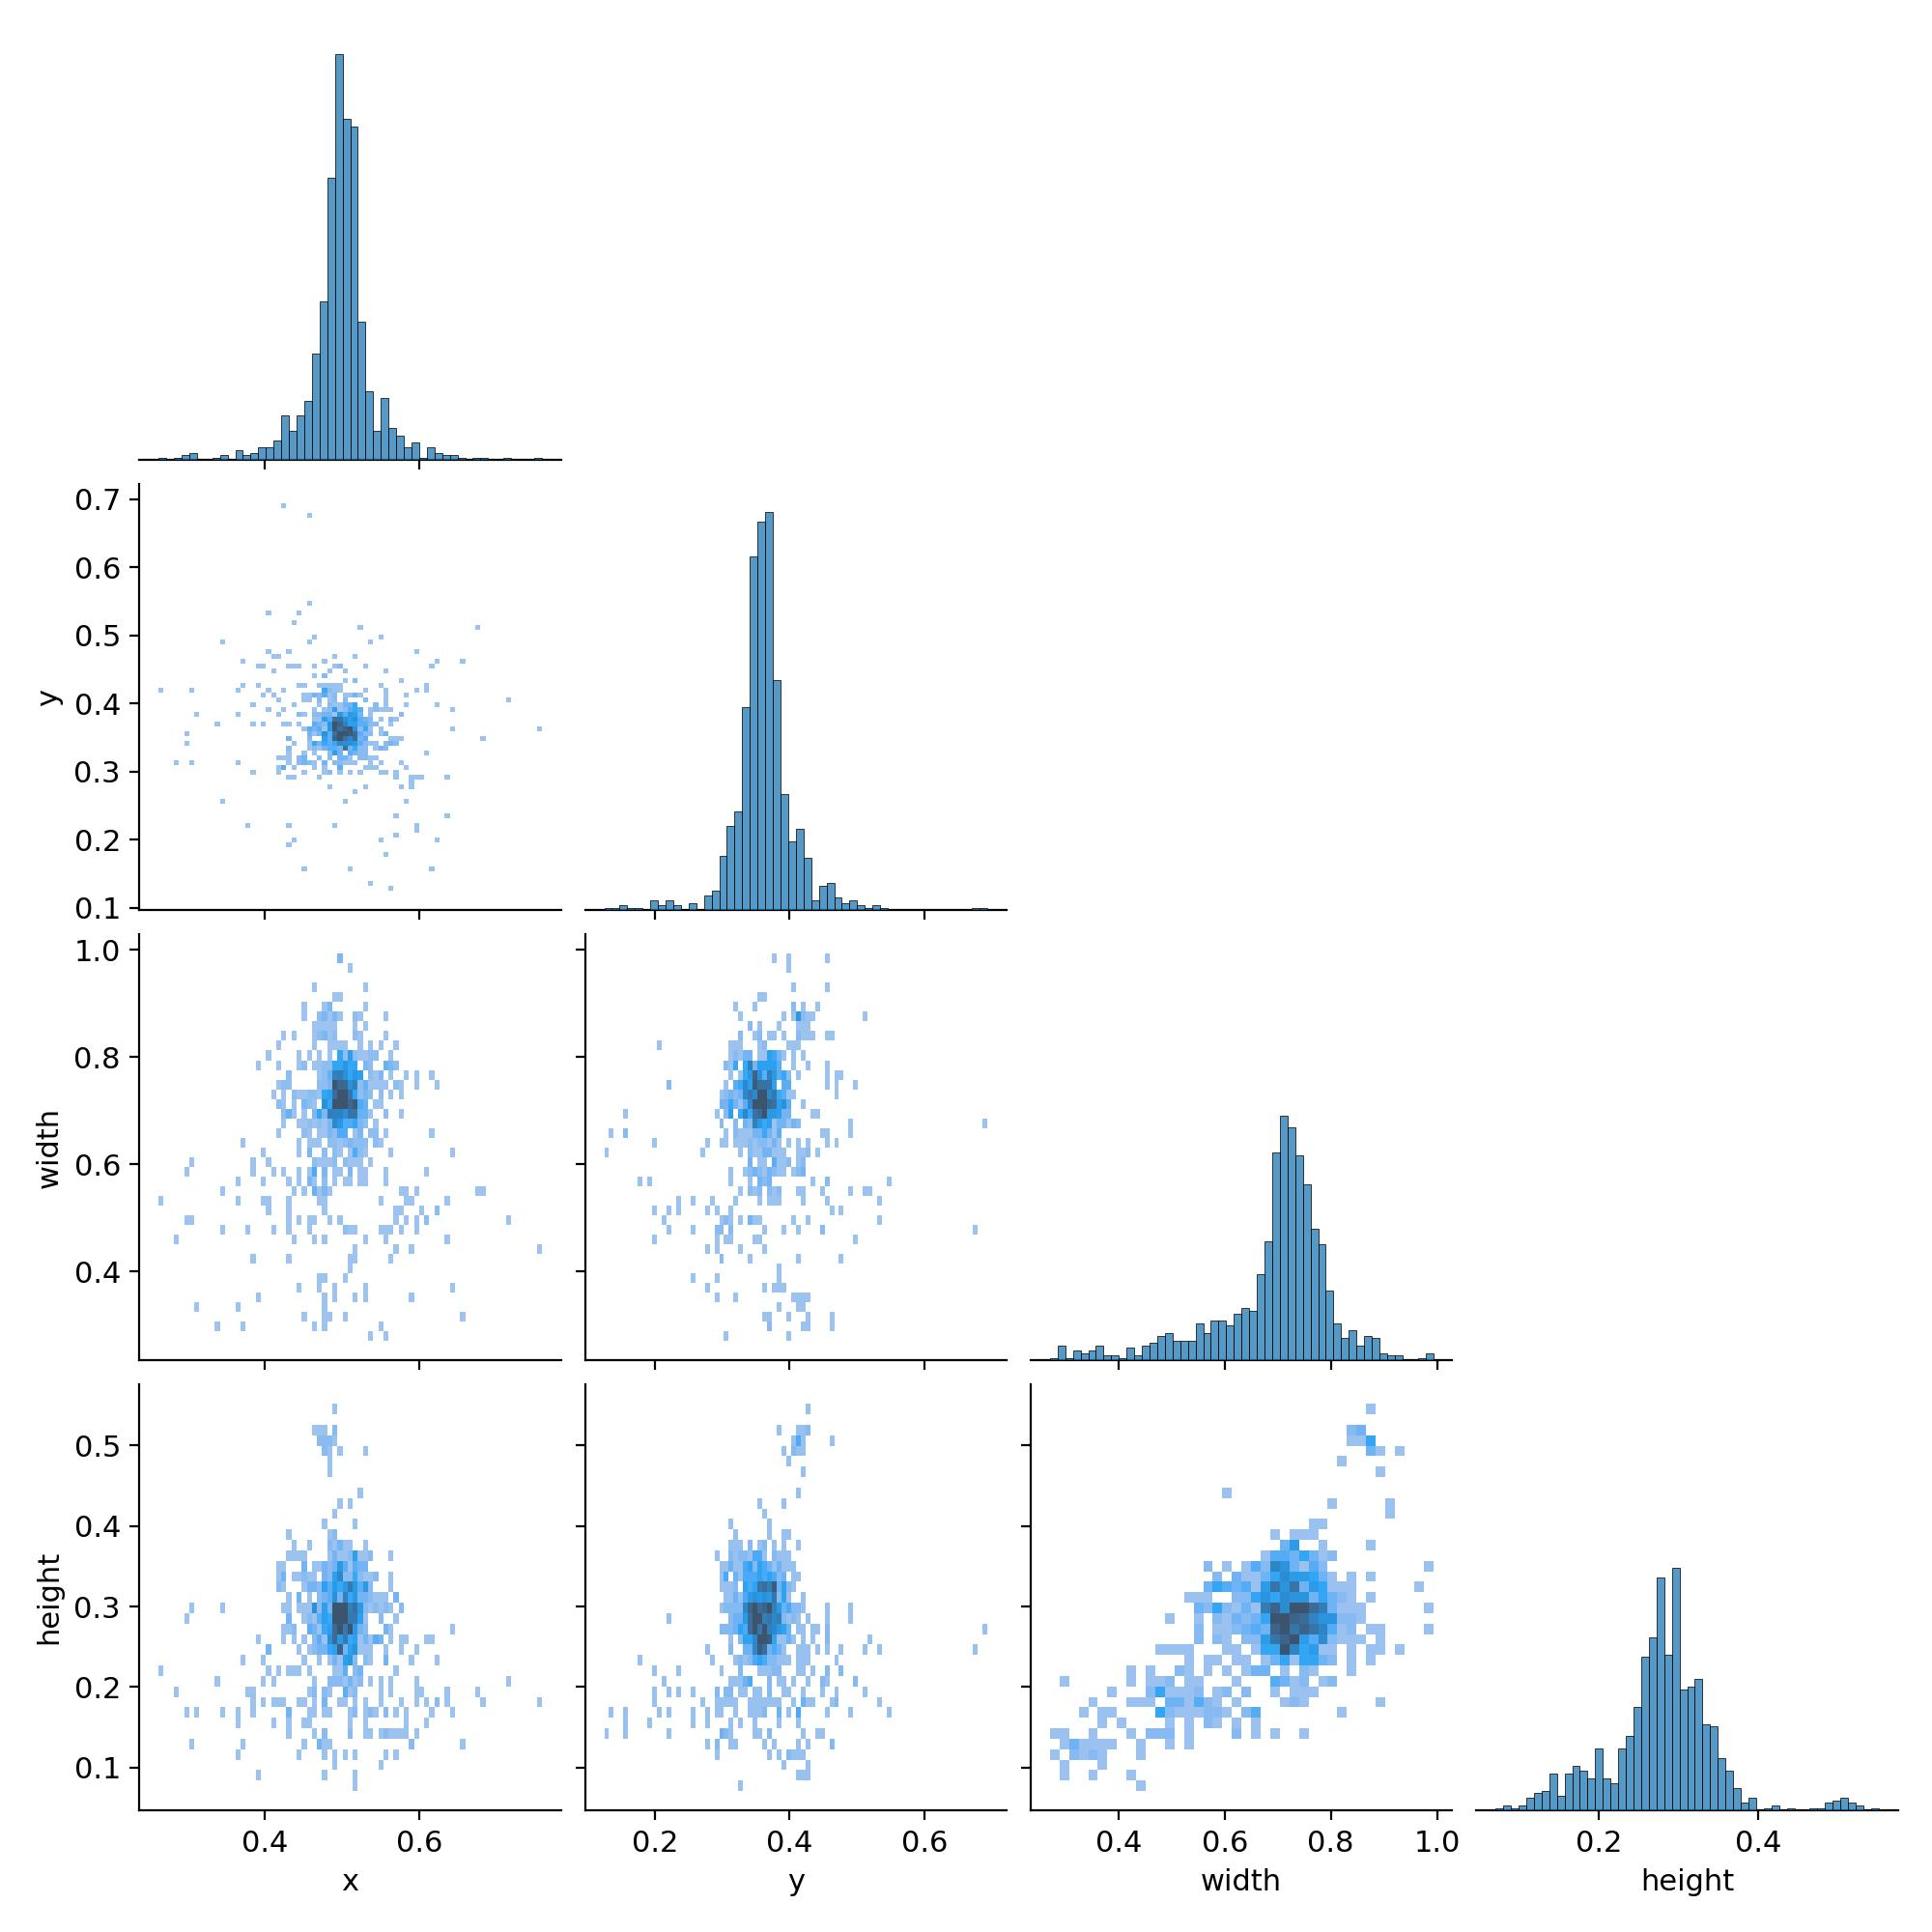

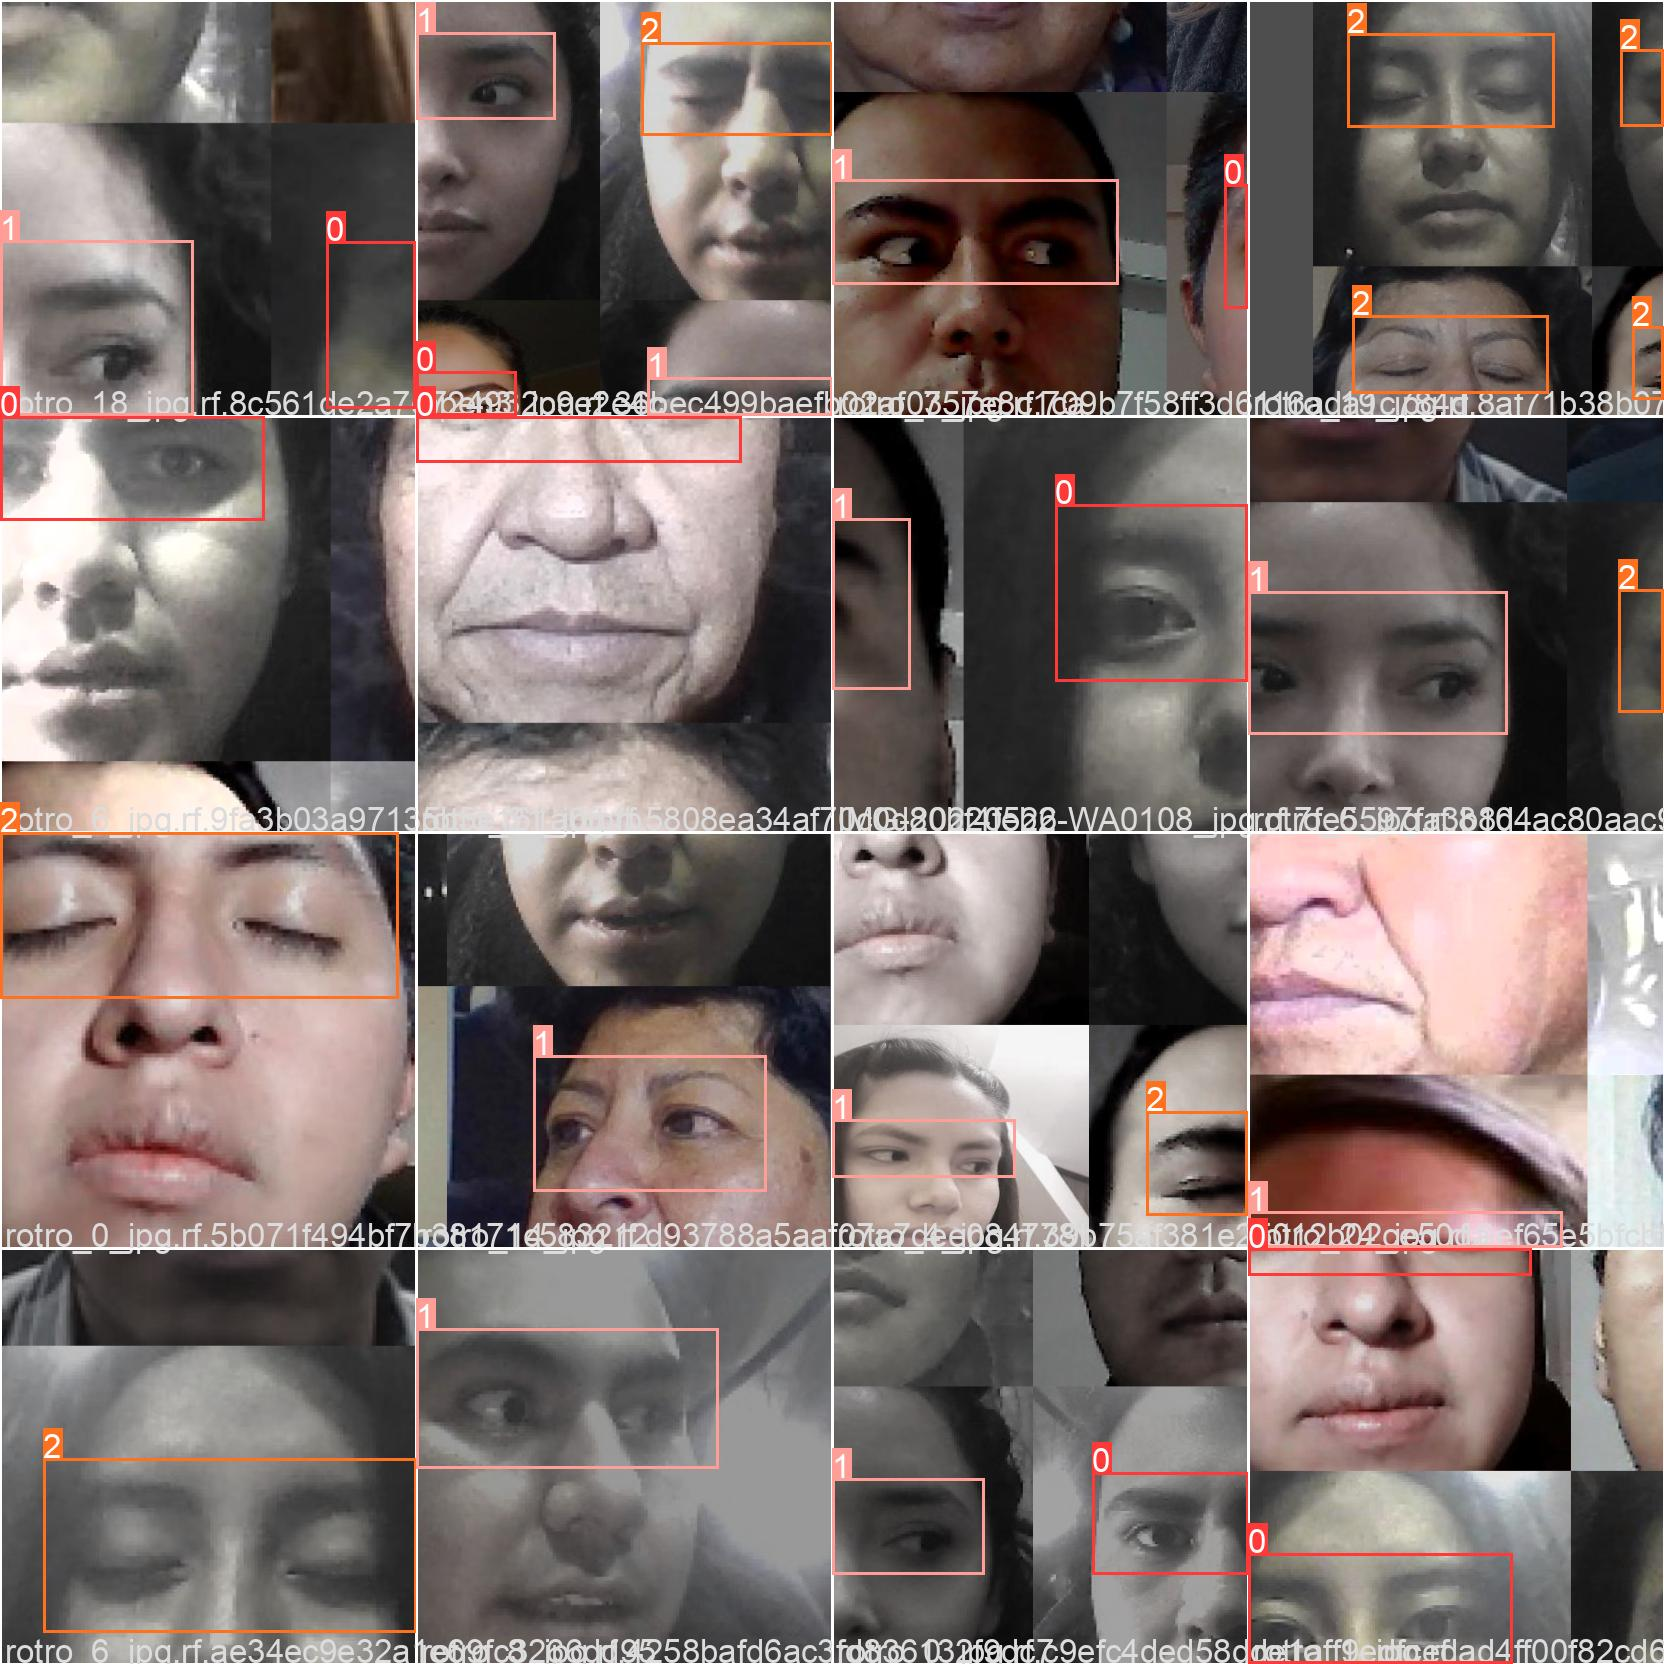

In [ ]:
#The glob function returns a list of entries that match the pattern specified in pathname.
import glob
from IPython.display import Image, display

for image in glob.glob('/content/yolov5/runs/train/yolov5s_results3/*.jpg')[:25]:
    display(Image(filename=image))
    print("\n")

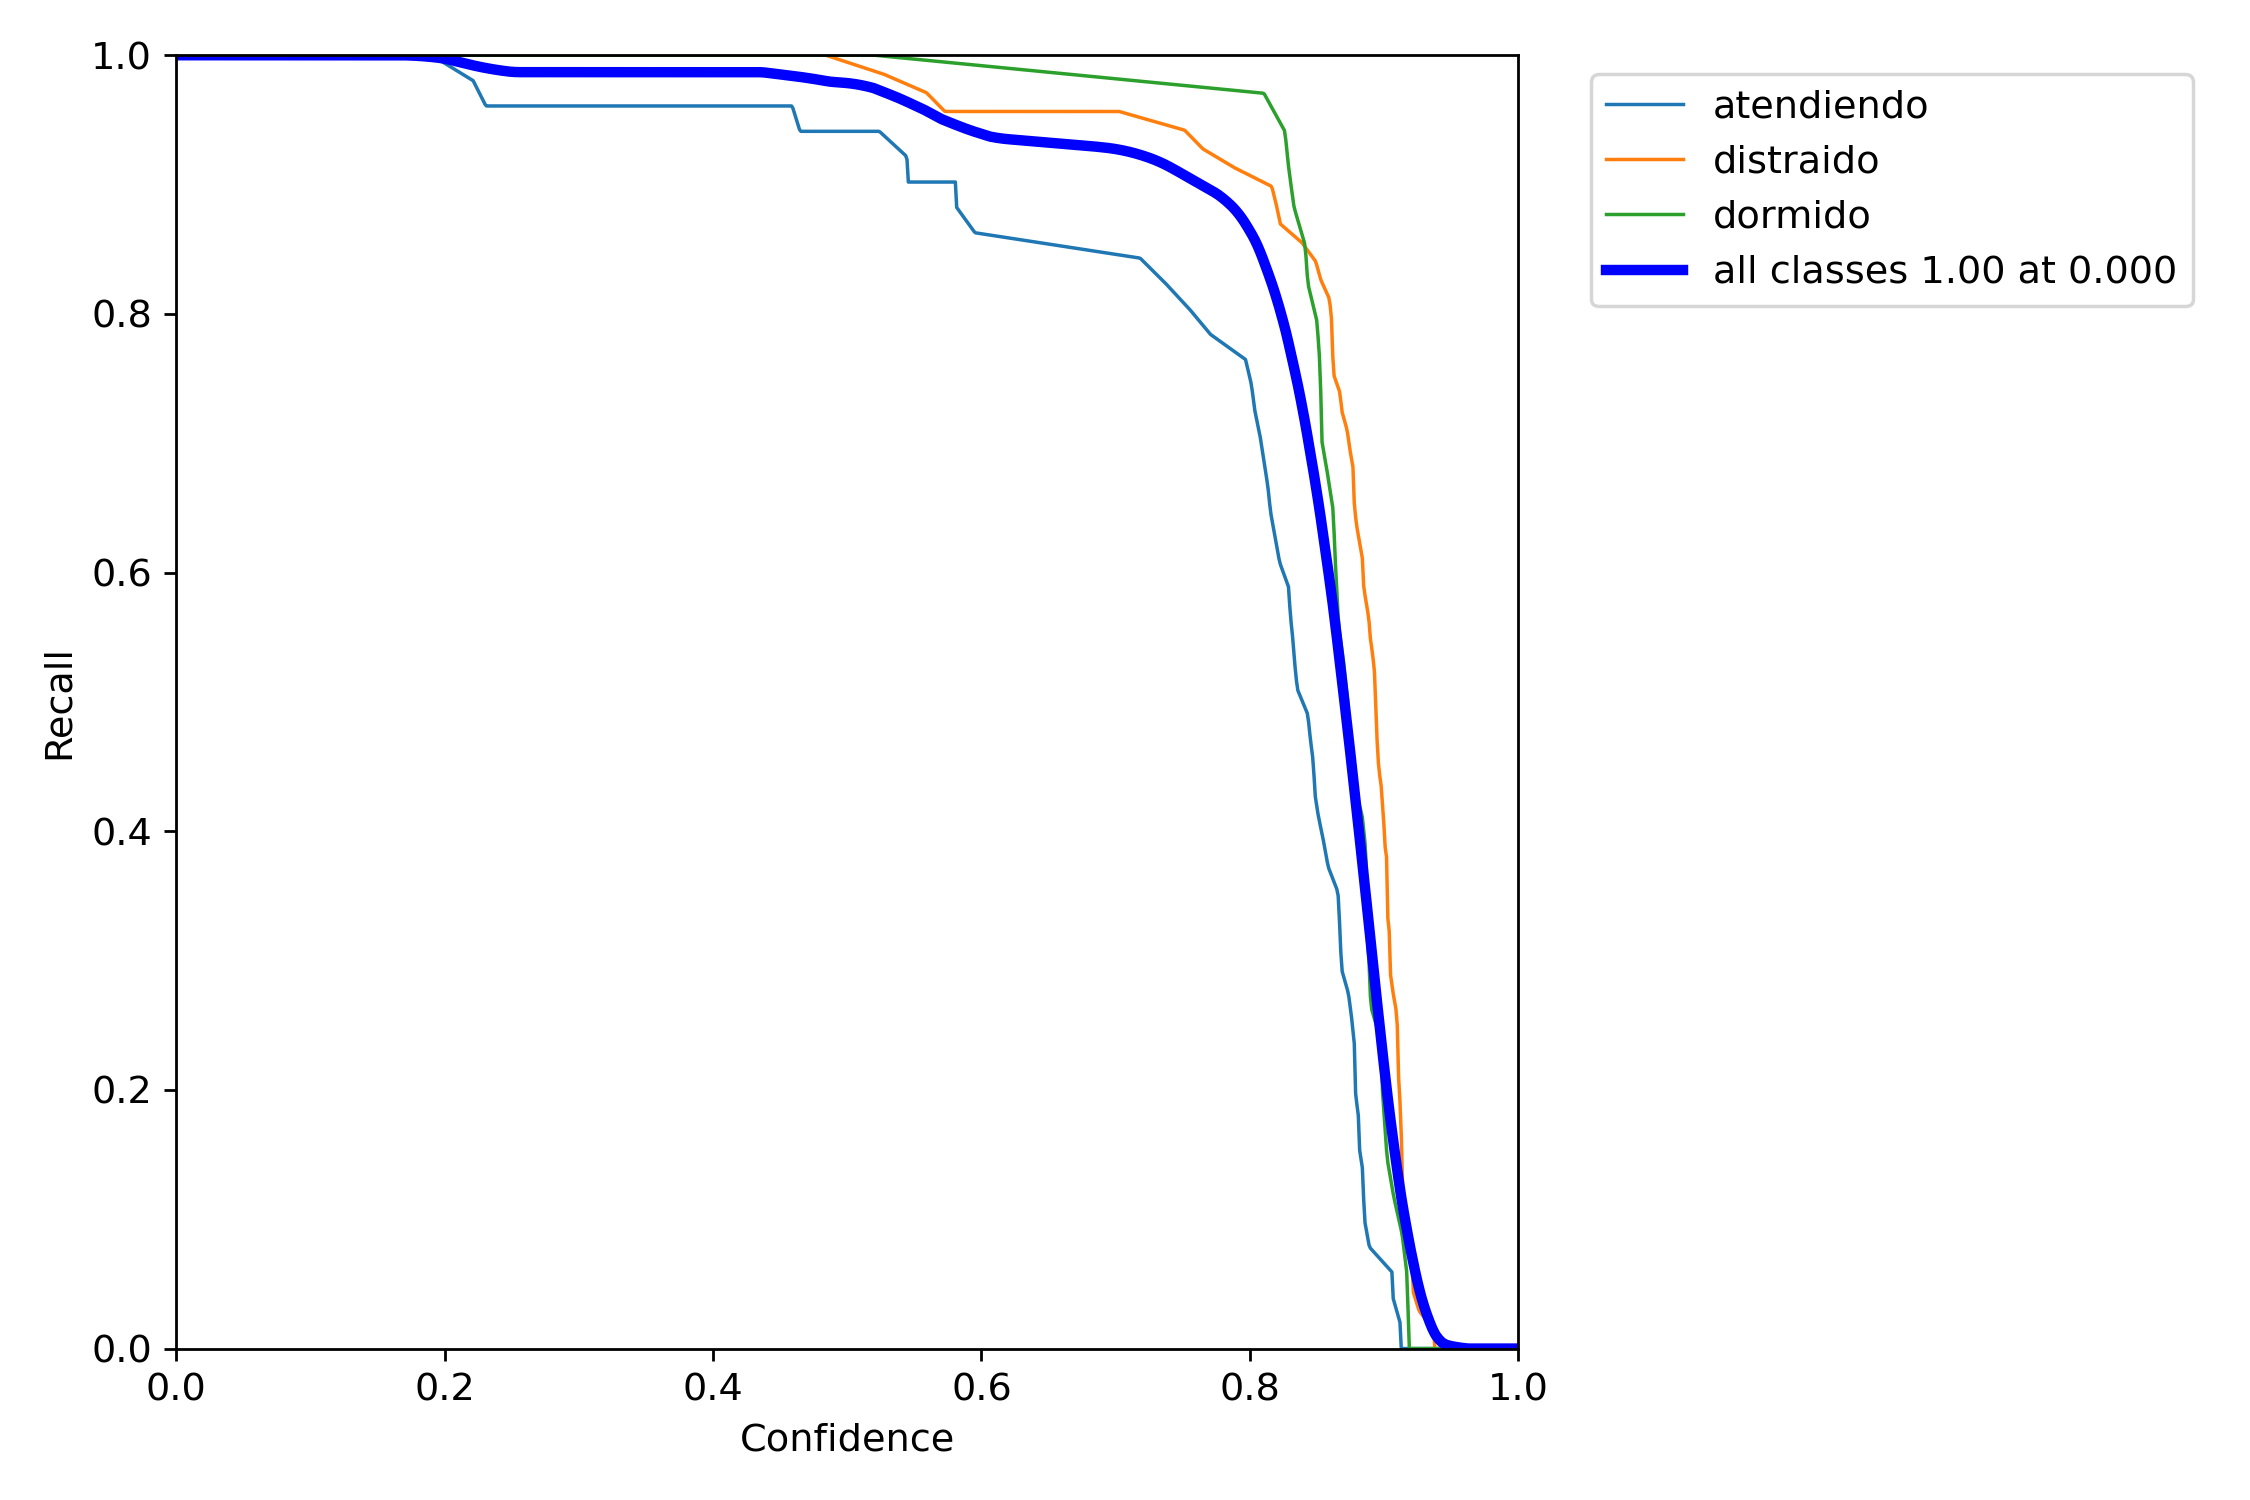

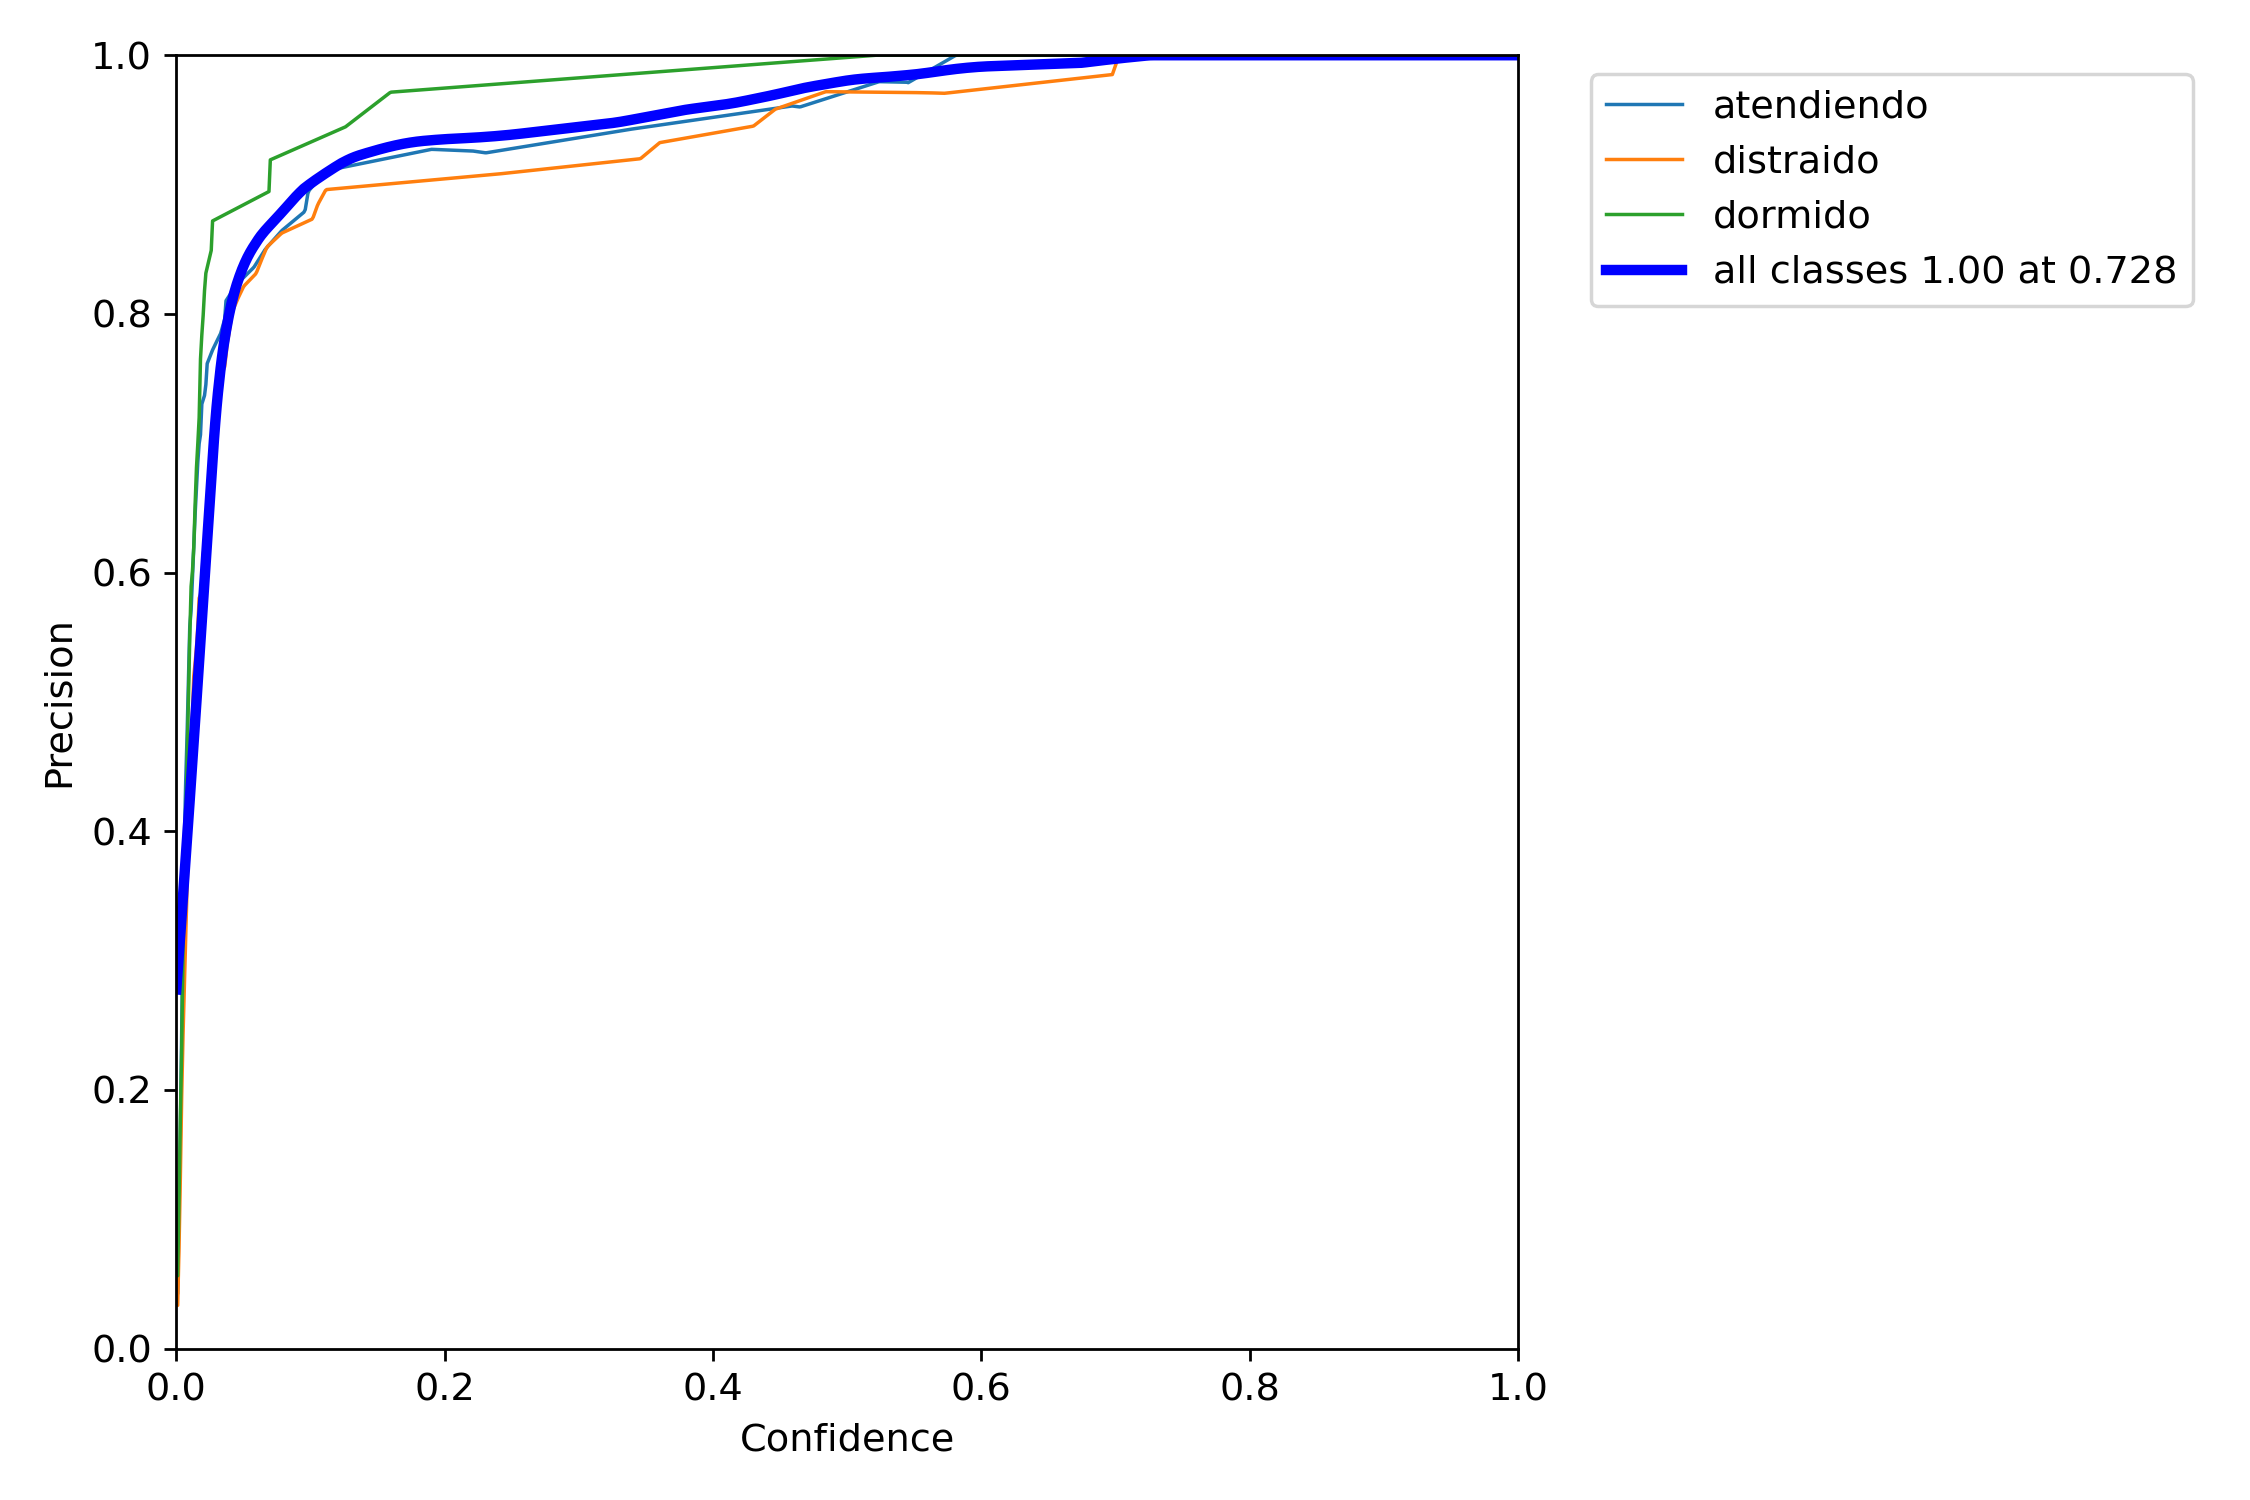

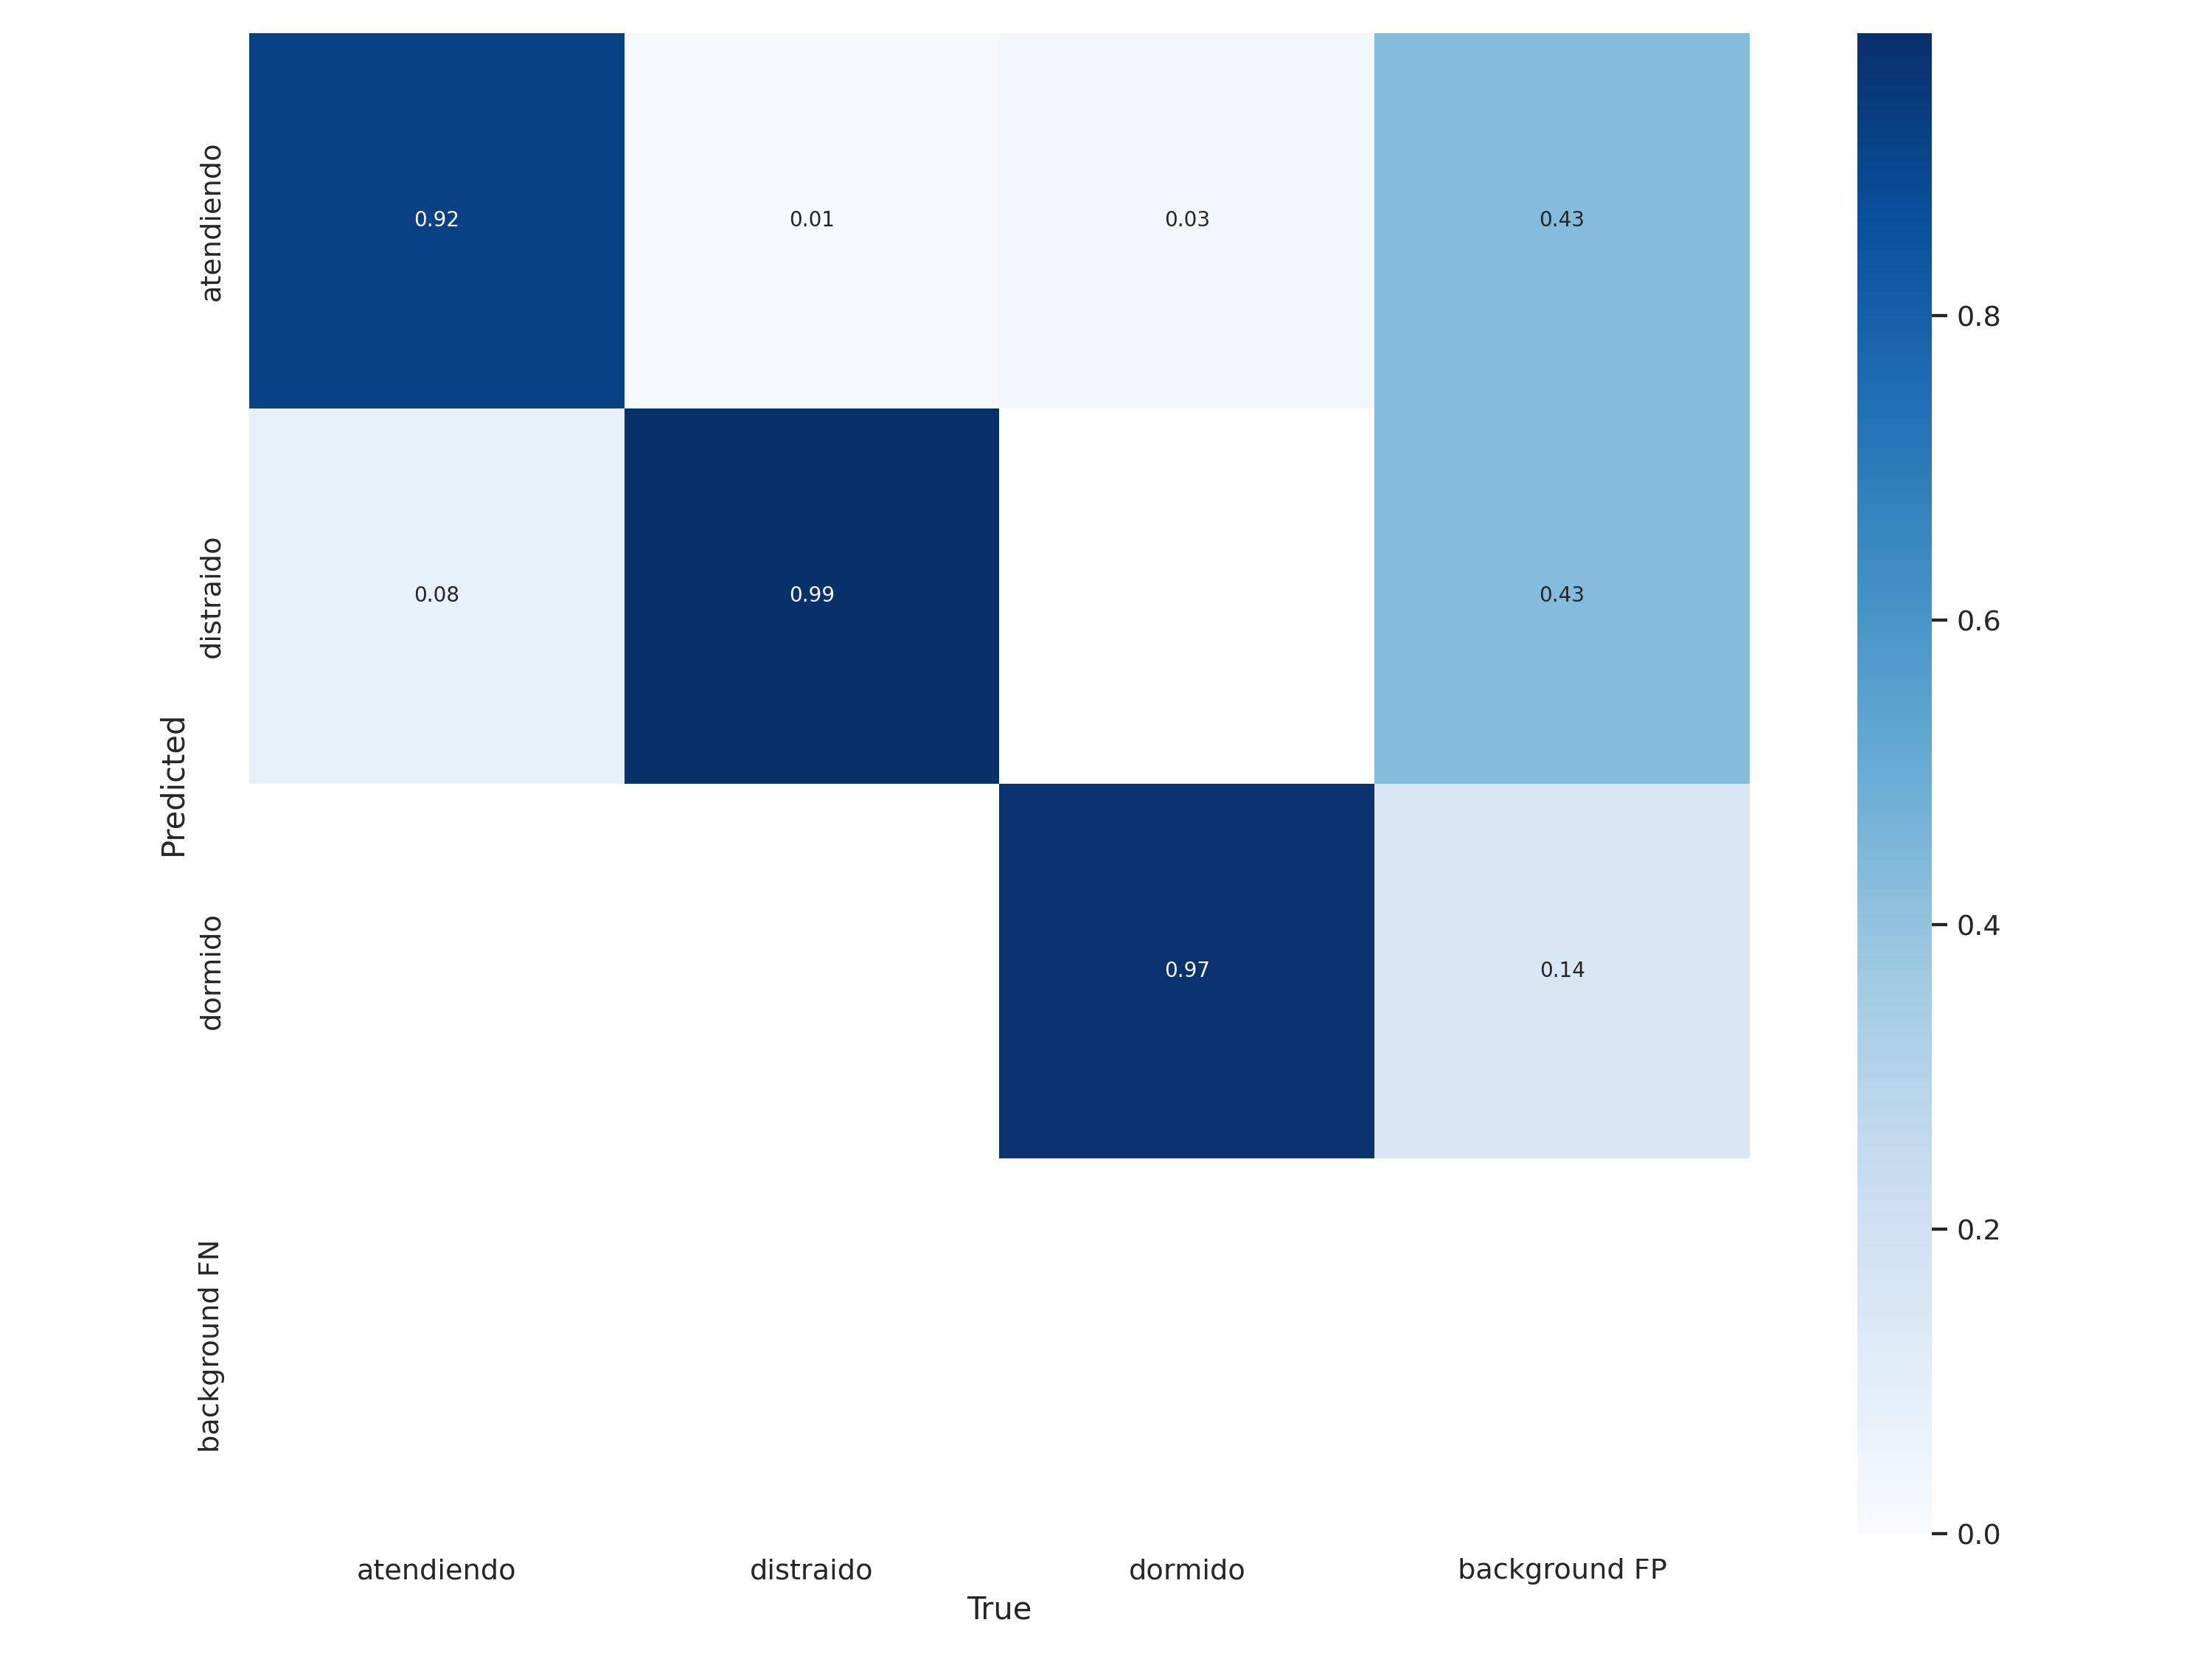

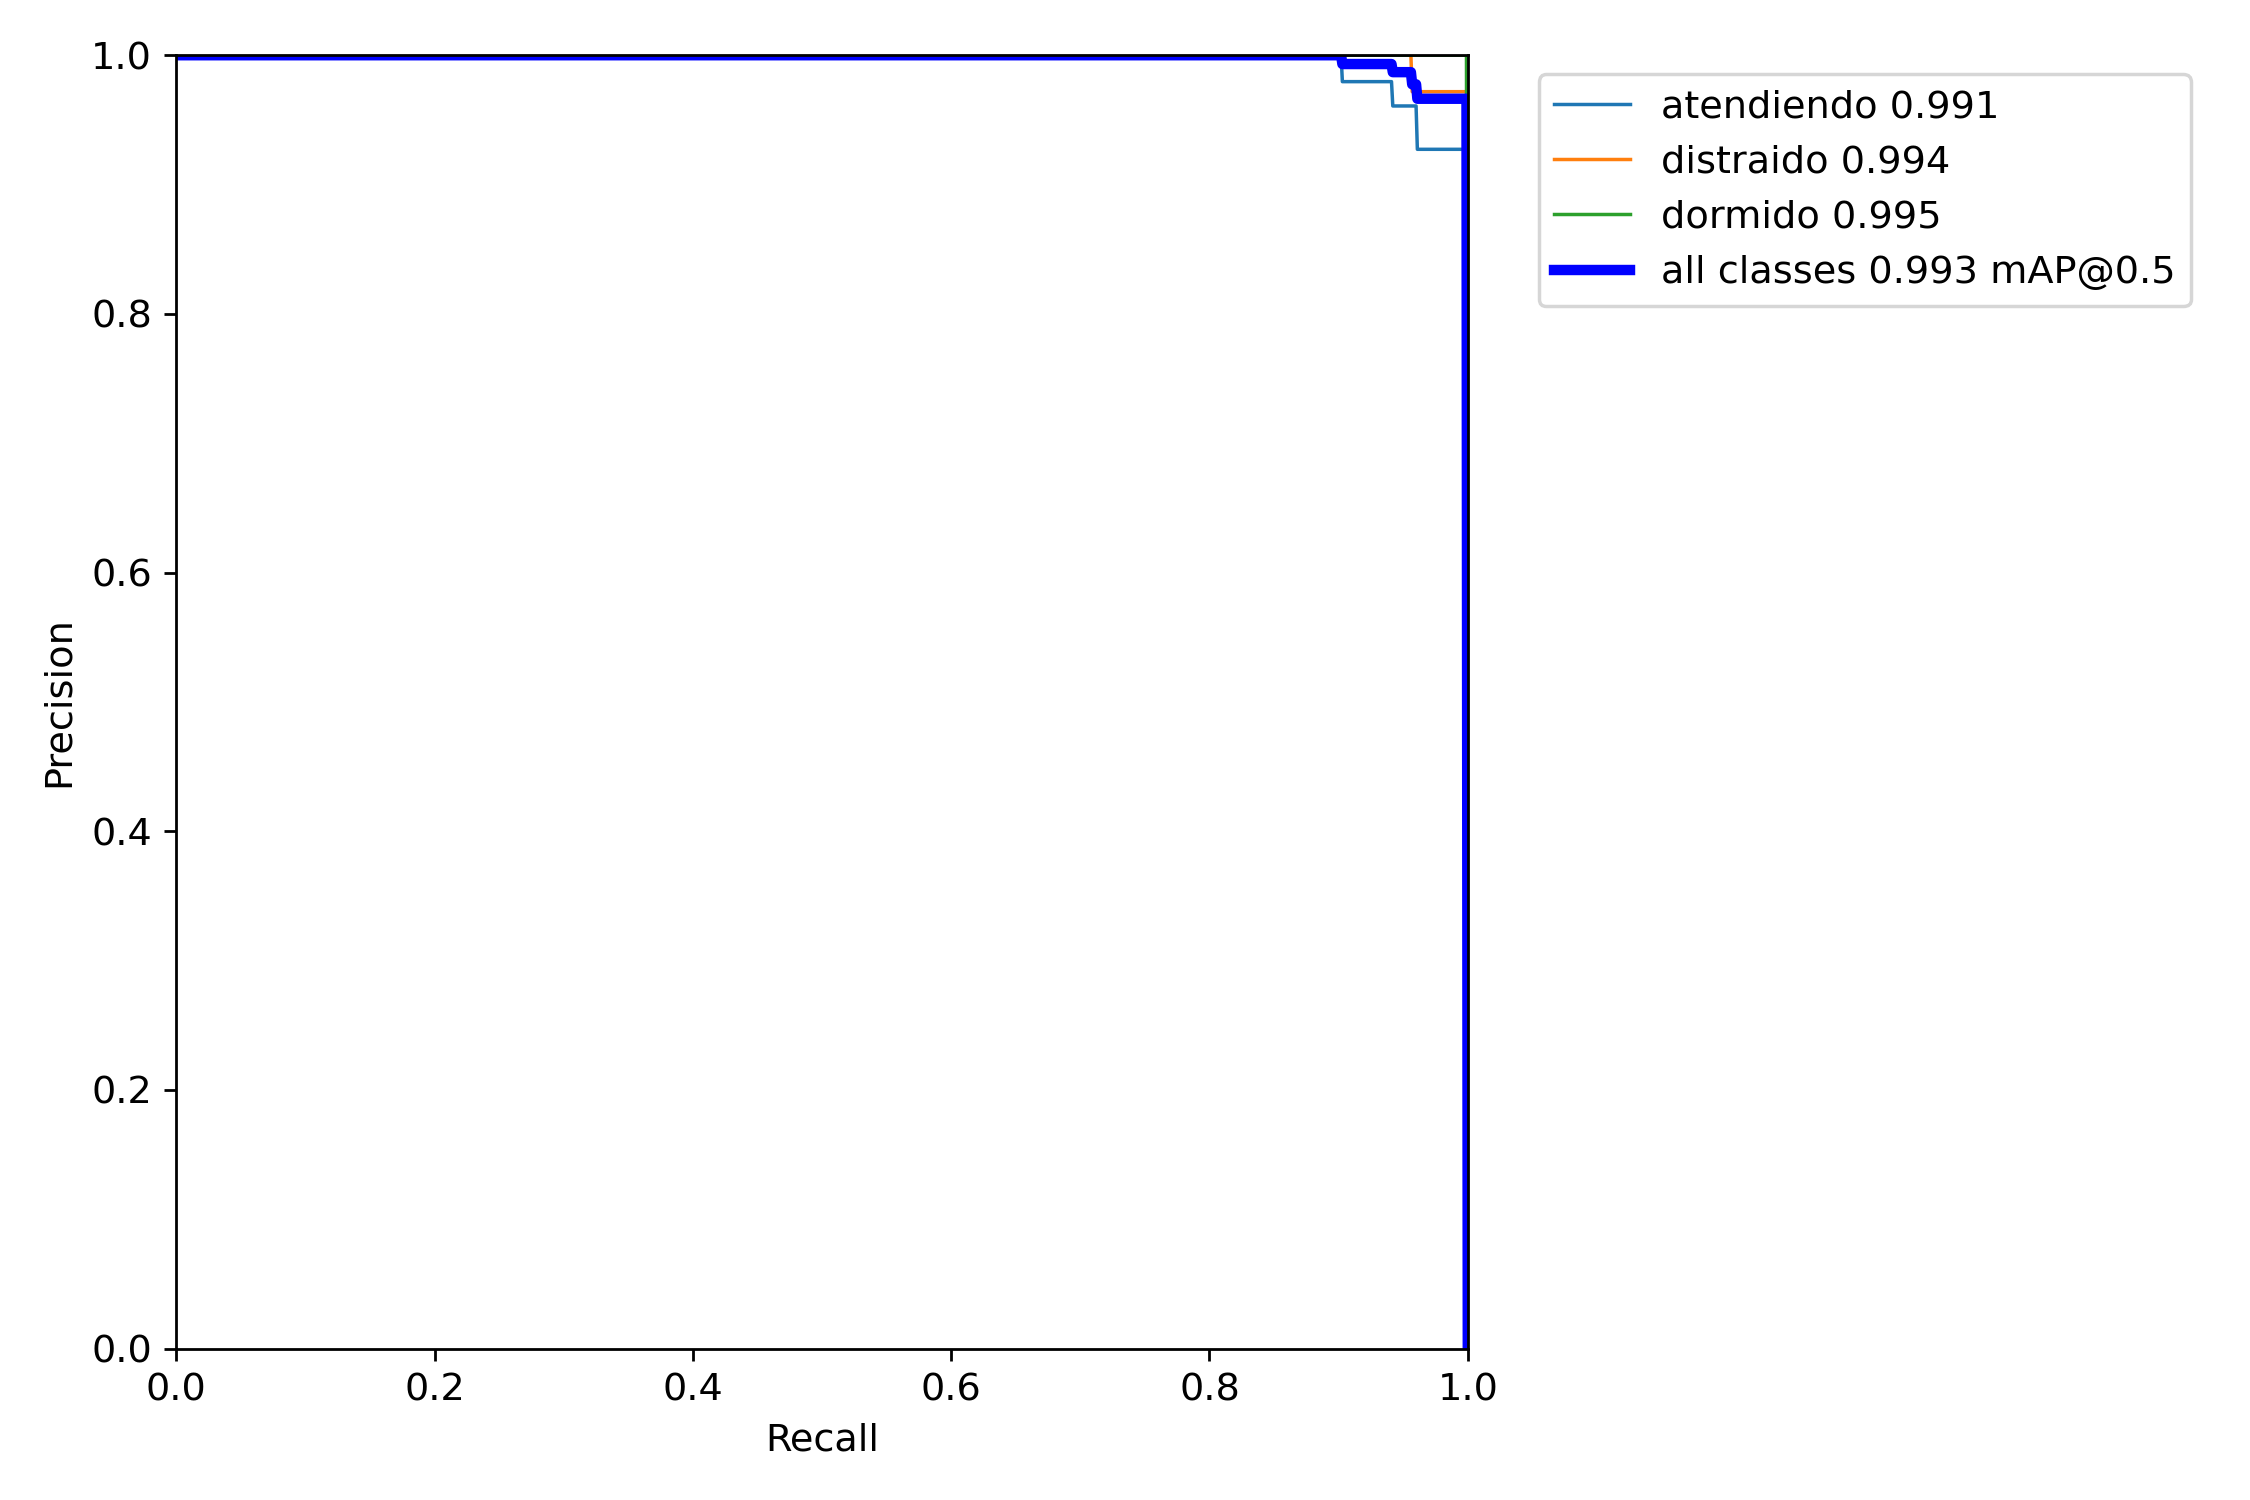

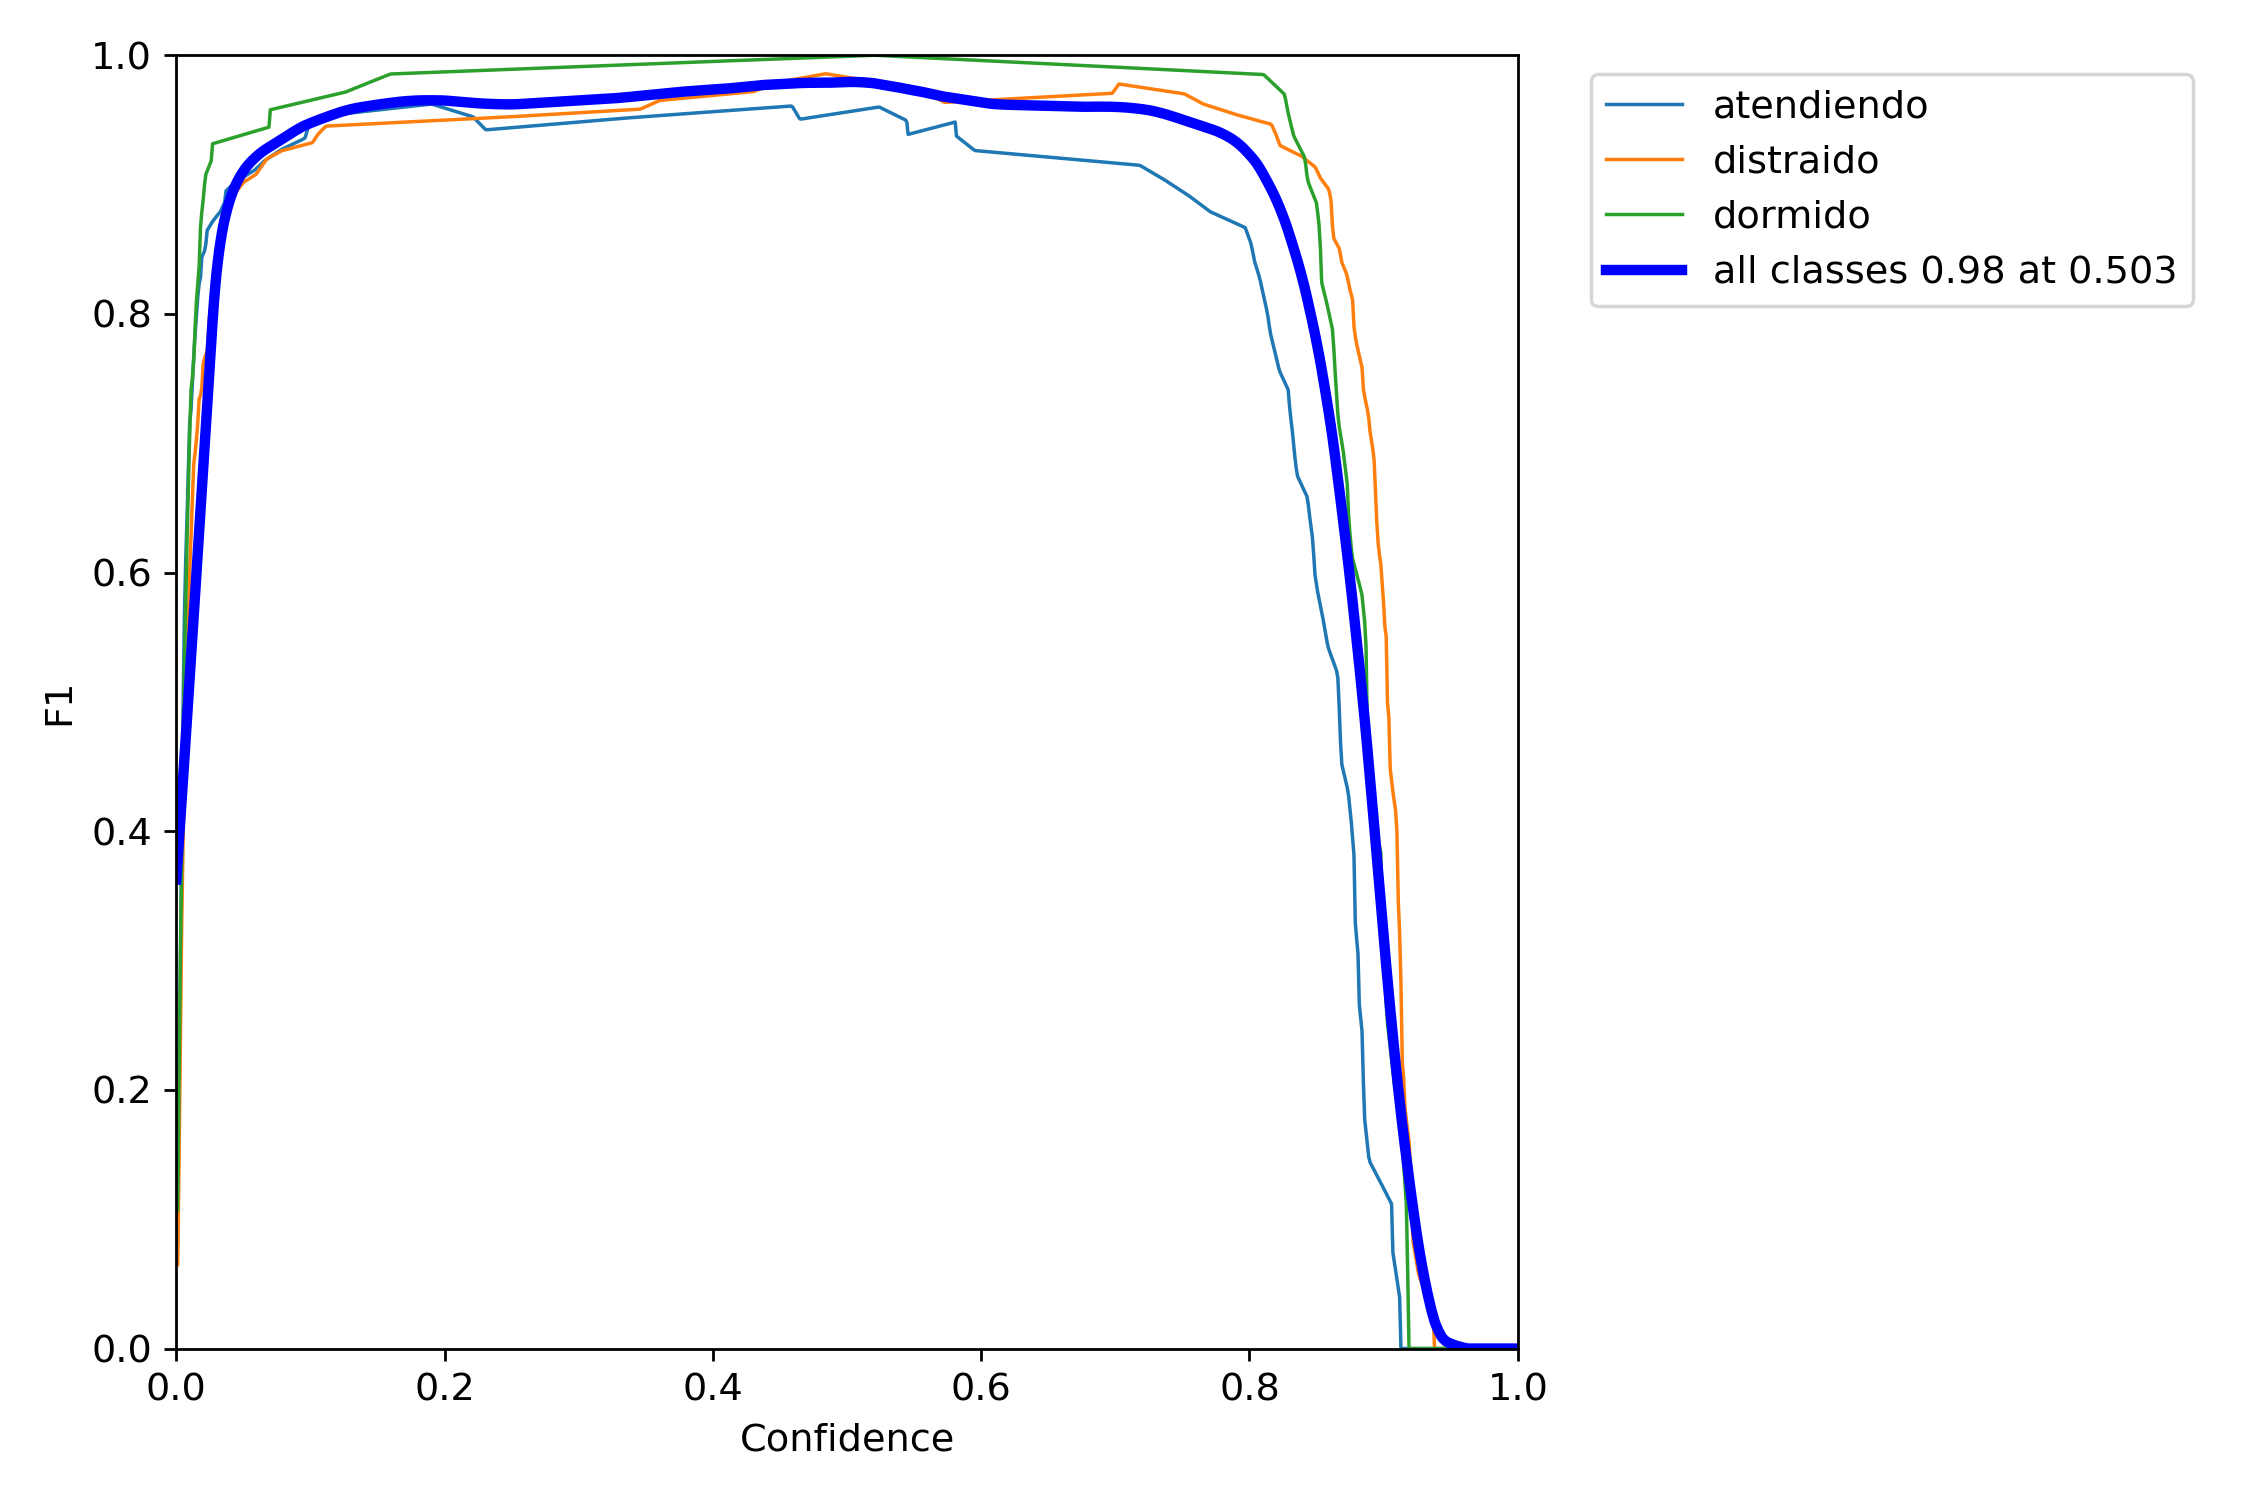

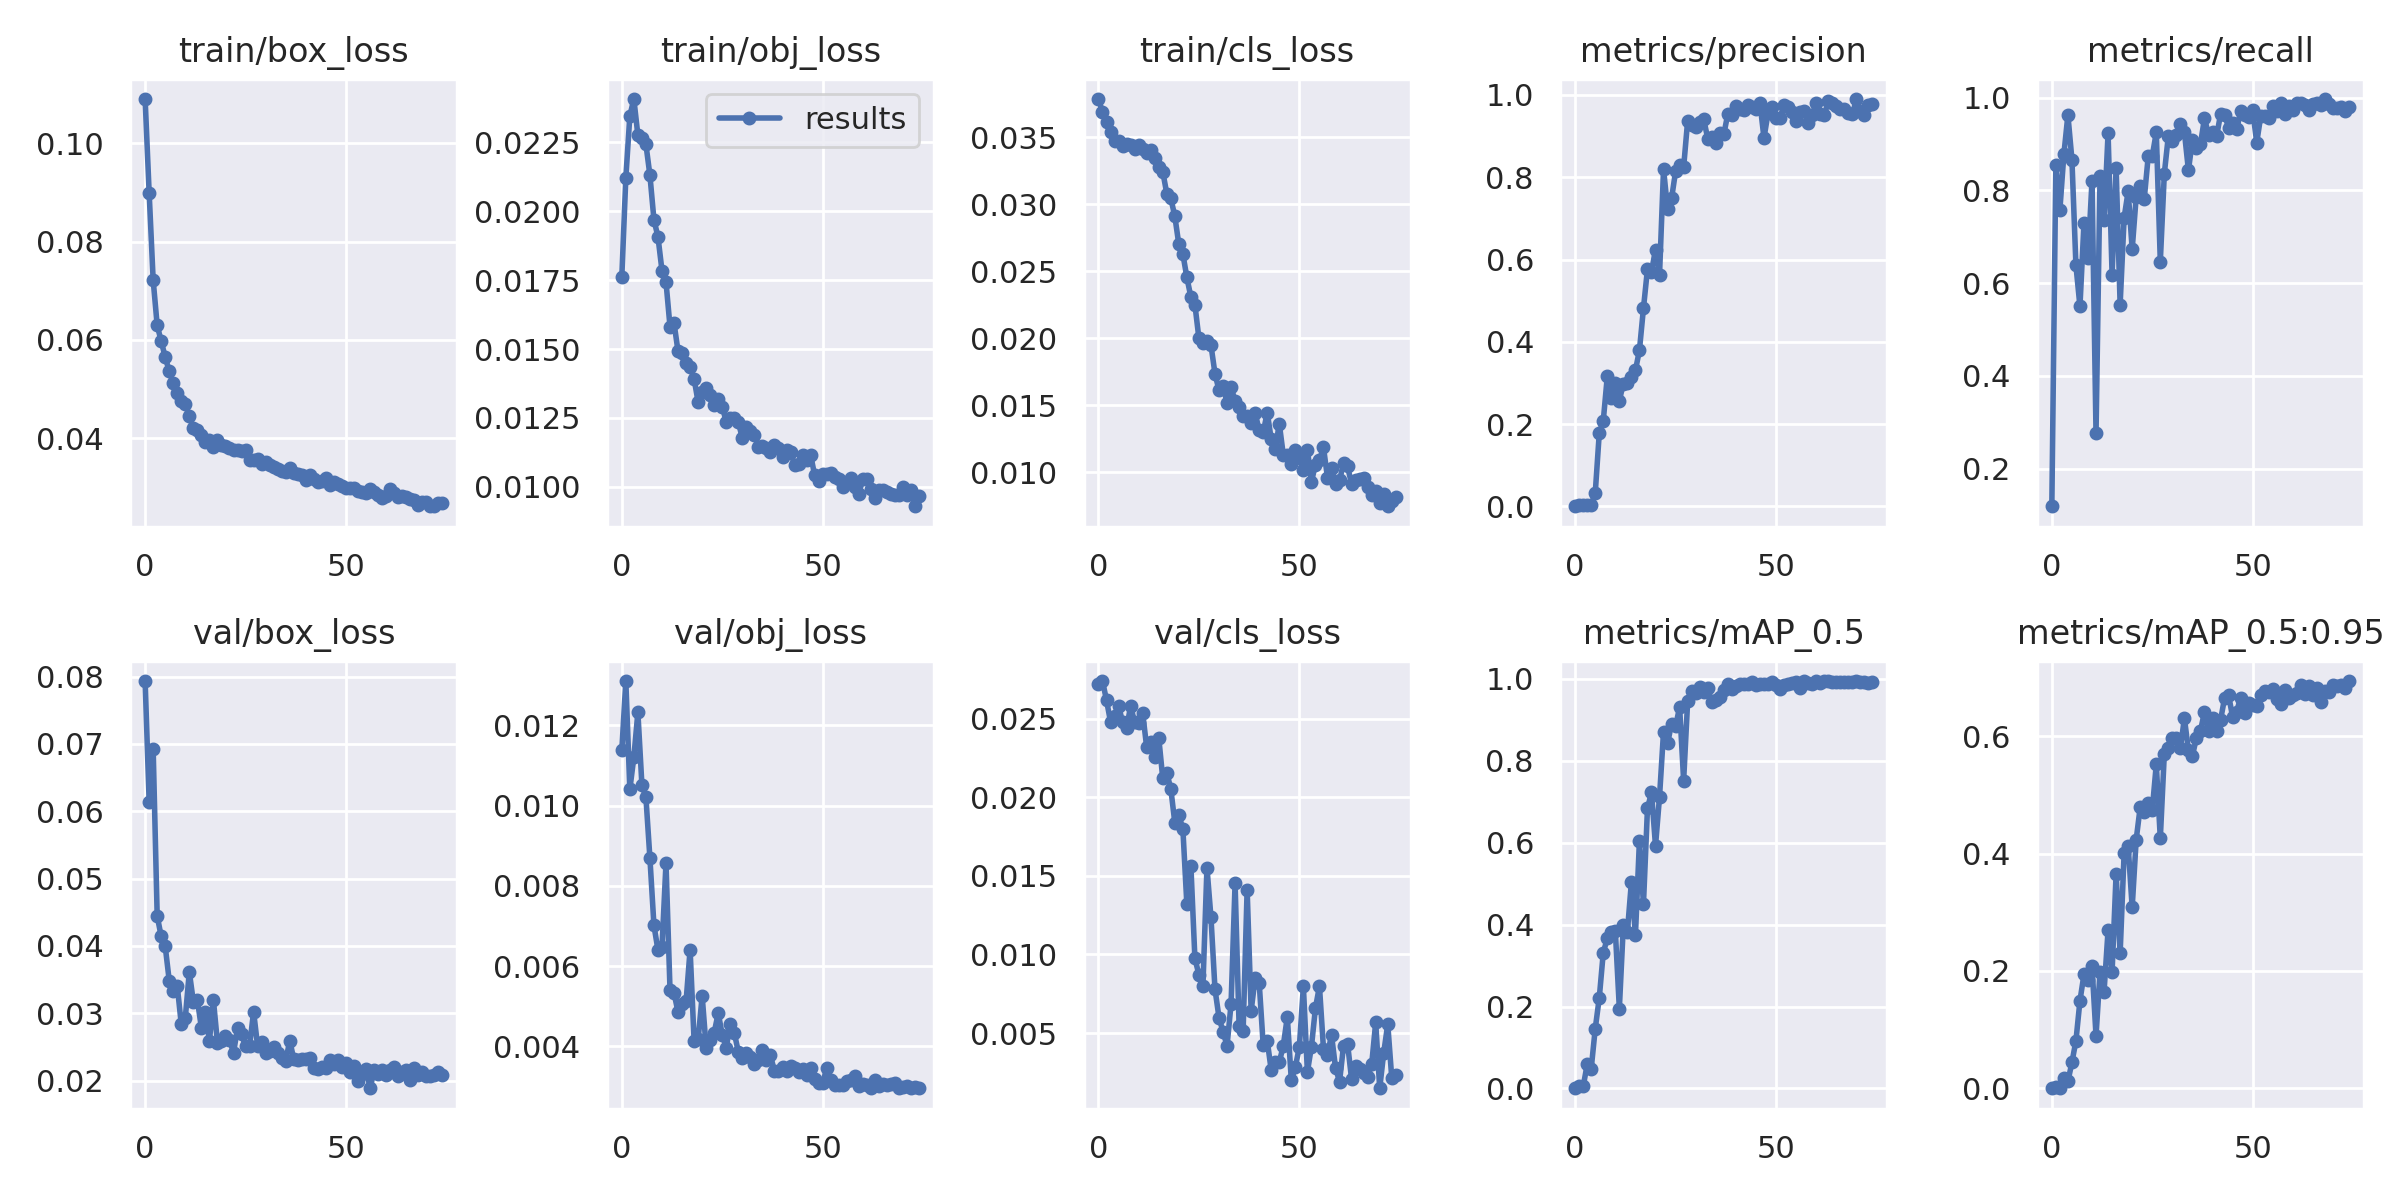

In [ ]:
#The glob function returns a list of entries that match the pattern specified in pathname.
import glob
from IPython.display import Image, display

for image in glob.glob('/content/yolov5/runs/train/yolov5s_results3/*.png')[:25]:
    display(Image(filename=image))
    print("\n")